# Solution for the project

---

## Data Analysis

First setup and load the data.

In [64]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# # remove limit of rows and columns
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

In [65]:
try:
    small_matrix = pd.read_csv("../KuaiRec/data/small_matrix.csv")
    big_matrix = pd.read_csv("../KuaiRec/data/big_matrix.csv")
    item_categories = pd.read_csv("../KuaiRec/data/item_categories.csv")
    user_features = pd.read_csv("../KuaiRec/data/user_features.csv")
    item_daily_features = pd.read_csv("../KuaiRec/data/item_daily_features.csv")
    caption_category = pd.read_csv("../KuaiRec/data/kuairec_caption_category.csv", engine="python", on_bad_lines="skip")
    social_network = pd.read_csv("../KuaiRec/data/social_network.csv")
except pd.errors.ParserError as e:
    print("Error parsing CSV file:", e)

#### Quick data inspection

In [66]:
print("Interactions (small matrix):")
display(small_matrix.head())

print("\nBig matrix:")
display(big_matrix.head())

print("\nItem categories:")
display(item_categories.head())

print("\nUser features:")
display(user_features.head())

print("\nItem daily features:")
display(item_daily_features.head())

print("\nCaption category:")
display(caption_category.head())

print("\nSocial network:")
display(social_network.head())

# Check for negative timestamps
display(small_matrix[small_matrix['timestamp'] < 0])
display(big_matrix[big_matrix['timestamp'] < 0])

Interactions (small matrix):


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364



Big matrix:


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000



Item categories:


,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]



User features:


,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,friend_user_num_range,register_days,register_days_range,onehot_feat0,onehot_feat1,onehot_feat2,onehot_feat3,onehot_feat4,onehot_feat5,onehot_feat6,onehot_feat7,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,0,107,61-90,0,1,17,638,2.0,0,1,6,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,"[1,5)",327,181-365,0,3,25,1021,0.0,0,1,6,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,0,116,91-180,0,6,8,402,0.0,0,0,2,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,0,105,61-90,0,1,8,281,0.0,0,0,34,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,0,225,181-365,0,1,8,316,1.0,0,1,46,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0



Item daily features:


,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,music_id,video_tag_id,video_tag_name,show_cnt,show_user_num,play_cnt,play_user_num,play_duration,complete_play_cnt,complete_play_user_num,valid_play_cnt,valid_play_user_num,long_time_play_cnt,long_time_play_user_num,short_time_play_cnt,short_time_play_user_num,play_progress,comment_stay_duration,like_cnt,like_user_num,click_like_cnt,double_click_cnt,cancel_like_cnt,cancel_like_user_num,comment_cnt,comment_user_num,direct_comment_cnt,reply_comment_cnt,delete_comment_cnt,delete_comment_user_num,comment_like_cnt,comment_like_user_num,follow_cnt,follow_user_num,cancel_follow_cnt,cancel_follow_user_num,share_cnt,share_user_num,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,3350323409,841,建筑,14665,11372,10141,7485,88729488,5657,4834,5503,4775,5503,4775,1939,1481,0.799860,6629173,573,569,315,257,87,85,11,11,8,3,0,0,112,61,284,284,0,0,2,2,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,3350323409,841,建筑,10883,8513,7321,5490,64264607,4162,3522,4039,3468,4039,3468,1340,1040,0.805253,3997498,302,301,159,142,47,47,7,7,6,1,0,0,60,32,201,200,0,0,1,1,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,3350323409,841,建筑,7842,6281,4757,3724,41338741,2734,2403,2640,2376,2640,2376,866,683,0.808821,3314323,205,205,121,84,52,50,4,3,3,1,0,0,59,26,131,131,0,0,1,1,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,3350323409,841,建筑,8916,7229,5172,3961,45281254,2950,2525,2865,2498,2865,2498,977,765,0.801680,4235579,297,293,178,119,60,59,4,4,2,2,0,0,91,46,179,179,0,0,2,2,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,3350323409,841,建筑,8502,6658,5392,3946,46952744,3058,2566,2946,2533,2945,2532,1046,752,0.805359,3862095,307,305,166,141,57,56,5,2,0,5,0,0,76,47,186,186,0,0,0,0,2,2,2,1,1,1,NaN,NaN,NaN,NaN



Caption category:


,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
1,1,UNKNOWN,NaN,[],27.0,高新数码,-124.0,UNKNOWN,-124.0,UNKNOWN
2,2,UNKNOWN,晚饭后，运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
3,3,UNKNOWN,我平淡无奇，惊艳不了时光，温柔不了岁月，我只想漫无目的的走走，努力发笔小财，给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装



Social network:


,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


#### Data types

In [67]:
print(small_matrix.dtypes)
print("\n", big_matrix.dtypes)
print("\n", item_categories.dtypes)
print("\n", user_features.dtypes)
print("\n", item_daily_features.dtypes)
print("\n", caption_category.dtypes)
print("\n", social_network.dtypes)

user_id             int64
video_id            int64
play_duration       int64
video_duration      int64
time               object
date              float64
timestamp         float64
watch_ratio       float64
dtype: object

 user_id             int64
video_id            int64
play_duration       int64
video_duration      int64
time               object
date                int64
timestamp         float64
watch_ratio       float64
dtype: object

 video_id     int64
feat        object
dtype: object

 user_id                    int64
user_active_degree        object
is_lowactive_period        int64
is_live_streamer           int64
is_video_author            int64
follow_user_num            int64
follow_user_num_range     object
fans_user_num              int64
fans_user_num_range       object
friend_user_num            int64
friend_user_num_range     object
register_days              int64
register_days_range       object
onehot_feat0               int64
onehot_feat1               int64
one

### Clean the data by removing duplicates and rows with nullated data

In [68]:
# Compare the dataframes sizes before and data cleaning
small_matrix_size = small_matrix.shape
big_matrix_size = big_matrix.shape
item_categories_size = item_categories.shape
user_features_size = user_features.shape
item_daily_features_size = item_daily_features.shape
caption_category_size = caption_category.shape
social_network_size = social_network.shape

print("\nDataframe sizes before data cleaning:")
print("Small matrix shape:", small_matrix.shape)
print("Big matrix shape:", big_matrix.shape)
print("Item categories shape:", item_categories.shape)  
print("User features shape:", user_features.shape)
print("Item daily features shape:", item_daily_features.shape)
print("Caption category shape:", caption_category.shape)
print("Social network shape:", social_network.shape)

# Data cleaning
# Remove duplicates and NaN values
small_matrix.dropna(inplace=True)
small_matrix.drop_duplicates(inplace=True)

big_matrix.dropna(inplace=True)
big_matrix.drop_duplicates(inplace=True)

item_categories.dropna(inplace=True)

user_features.dropna(inplace=True)
user_features.drop_duplicates(inplace=True)

item_daily_features.dropna(inplace=True)
item_daily_features.drop_duplicates(inplace=True)

caption_category.dropna(inplace=True)
caption_category.drop_duplicates(inplace=True)

social_network.dropna(inplace=True)
social_network.drop_duplicates(inplace=True)

# Remove negative timestamps
small_matrix = small_matrix[small_matrix['timestamp'] >= 0]
big_matrix = big_matrix[big_matrix['timestamp'] >= 0]

# Remove rows with invalid user_id or item_id
small_matrix = small_matrix[small_matrix['user_id'].notnull() & small_matrix['video_id'].notnull()]
big_matrix = big_matrix[big_matrix['user_id'].notnull() & big_matrix['video_id'].notnull()]

print("\nAfter data cleaning:")
print("Small matrix shape:", small_matrix.shape, "size difference:", small_matrix_size[0] - small_matrix.shape[0])
print("Big matrix shape:", big_matrix.shape, "size difference:", big_matrix_size[0] - big_matrix.shape[0])
print("Item categories shape:", item_categories.shape, "size difference:", item_categories_size[0] - item_categories.shape[0])
print("User features shape:", user_features.shape, "size difference:", user_features_size[0] - user_features.shape[0])
print("Item daily features shape:", item_daily_features.shape, "size difference:", item_daily_features_size[0] - item_daily_features.shape[0])
print("Caption category shape:", caption_category.shape, "size difference:", caption_category_size[0] - caption_category.shape[0])
print("Social network shape:", social_network.shape, "size difference:", social_network_size[0] - social_network.shape[0])


Dataframe sizes before data cleaning:
Small matrix shape: (4676570, 8)
Big matrix shape: (12530806, 8)
Item categories shape: (10728, 2)
User features shape: (7176, 31)
Item daily features shape: (343341, 58)
Caption category shape: (10732, 10)
Social network shape: (472, 2)



After data cleaning:
Small matrix shape: (4494578, 8) size difference: 181992
Big matrix shape: (11564987, 8) size difference: 965819
Item categories shape: (10728, 2) size difference: 0
User features shape: (6899, 31) size difference: 277
Item daily features shape: (239968, 58) size difference: 103373
Caption category shape: (9369, 10) size difference: 1363
Social network shape: (472, 2) size difference: 0


### Getting an idea of how many users and videos we are dealing with

In [69]:
# Combine user_id columns from both dataframes
all_user_ids = pd.concat([small_matrix['user_id'], big_matrix['user_id']])

# Get the count of unique user_ids across both dataframes
total_unique_users_combined = all_user_ids.nunique()

# Combine video_id columns from both dataframes
all_video_ids = pd.concat([small_matrix['video_id'], big_matrix['video_id']])

# Get the count of unique video_ids across both dataframes
total_unique_videos_combined = all_video_ids.nunique()

print(f"Nombre total d'utilisateurs uniques (combiné) : {total_unique_users_combined}")
print(f"Nombre total de vidéos uniques (combiné) : {total_unique_videos_combined}")

# You might also want to see the counts from big_matrix alone for comparison,
# as it's likely the more comprehensive dataset.
total_users_big_matrix = big_matrix['user_id'].nunique()
total_videos_big_matrix = big_matrix['video_id'].nunique()

print(f"Nombre total d'utilisateurs uniques (big_matrix seulement) : {total_users_big_matrix}")
print(f"Nombre total de vidéos uniques (big_matrix seulement) : {total_videos_big_matrix}")

Nombre total d'utilisateurs uniques (combiné) : 7176
Nombre total de vidéos uniques (combiné) : 10728
Nombre total d'utilisateurs uniques (big_matrix seulement) : 7176
Nombre total de vidéos uniques (big_matrix seulement) : 10728


On constate que la big_matrix contient toutes les videos et tous les users

### Interactions (small matrix) Data Analysis

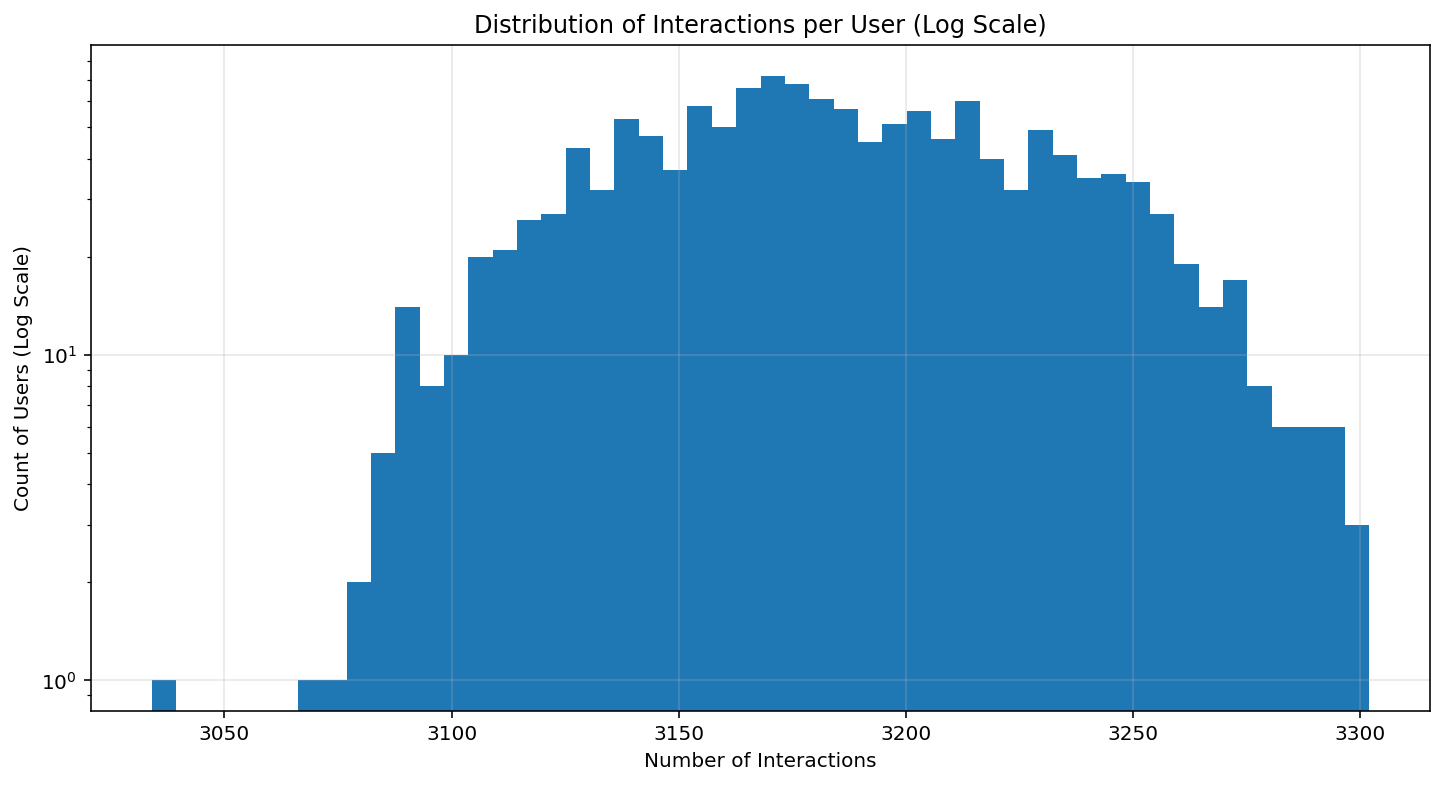

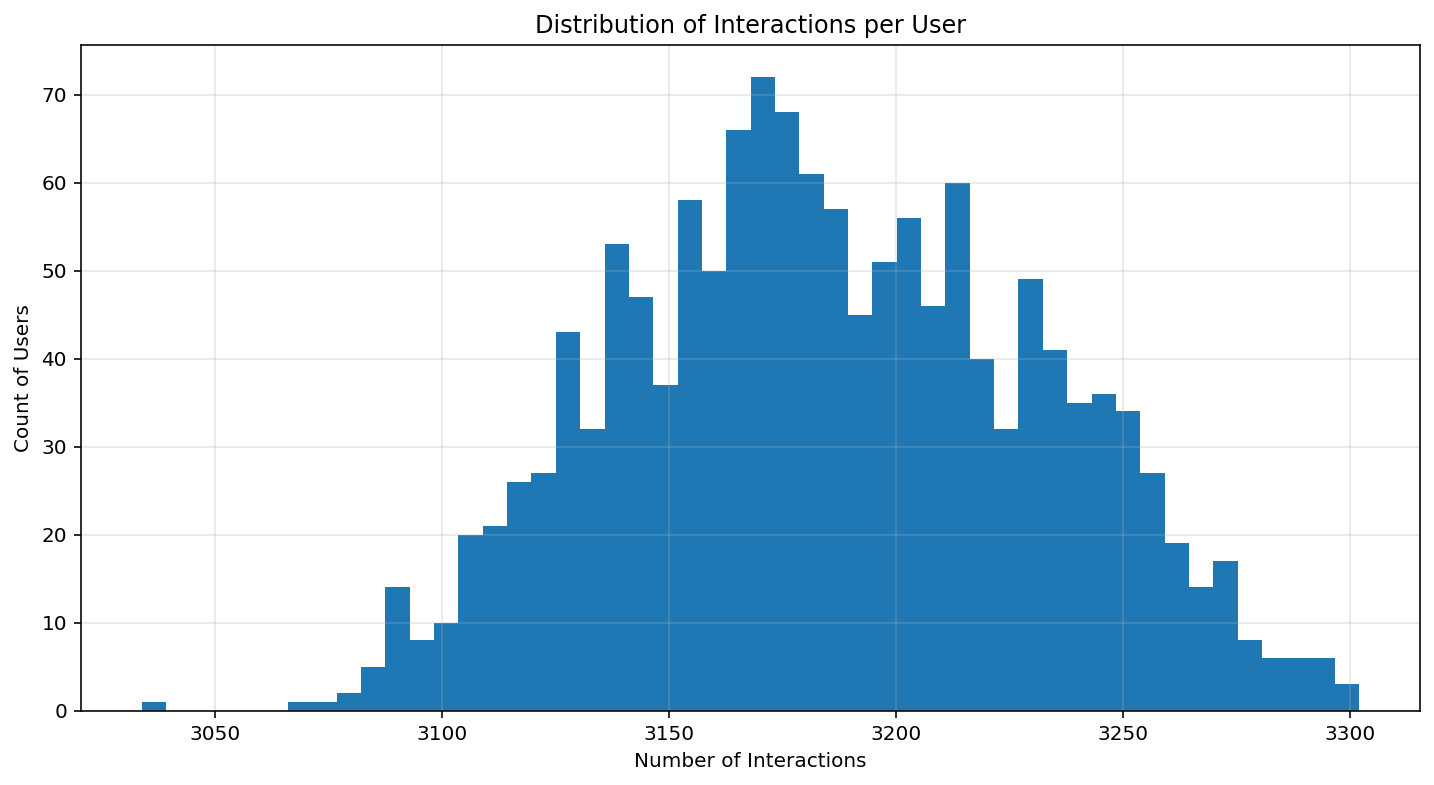

In [70]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = small_matrix["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

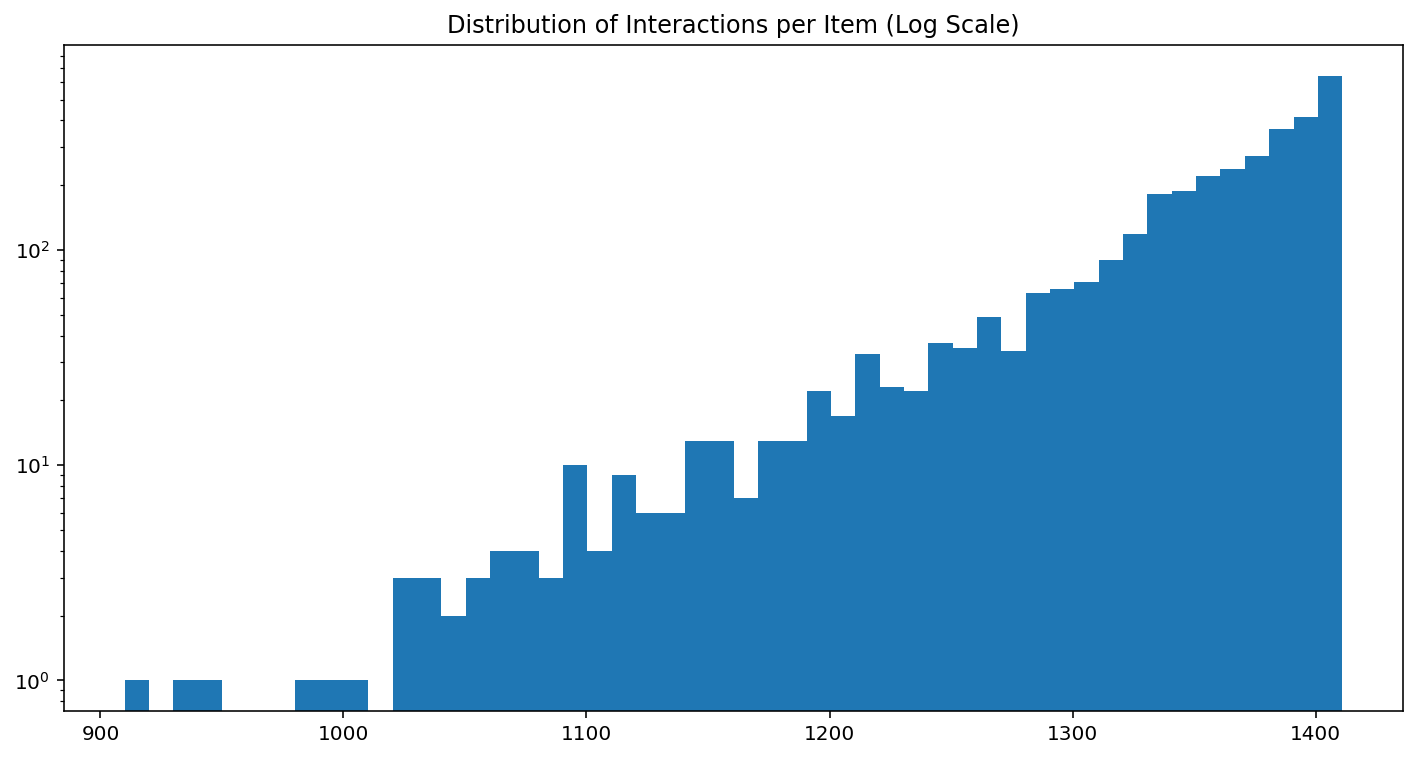

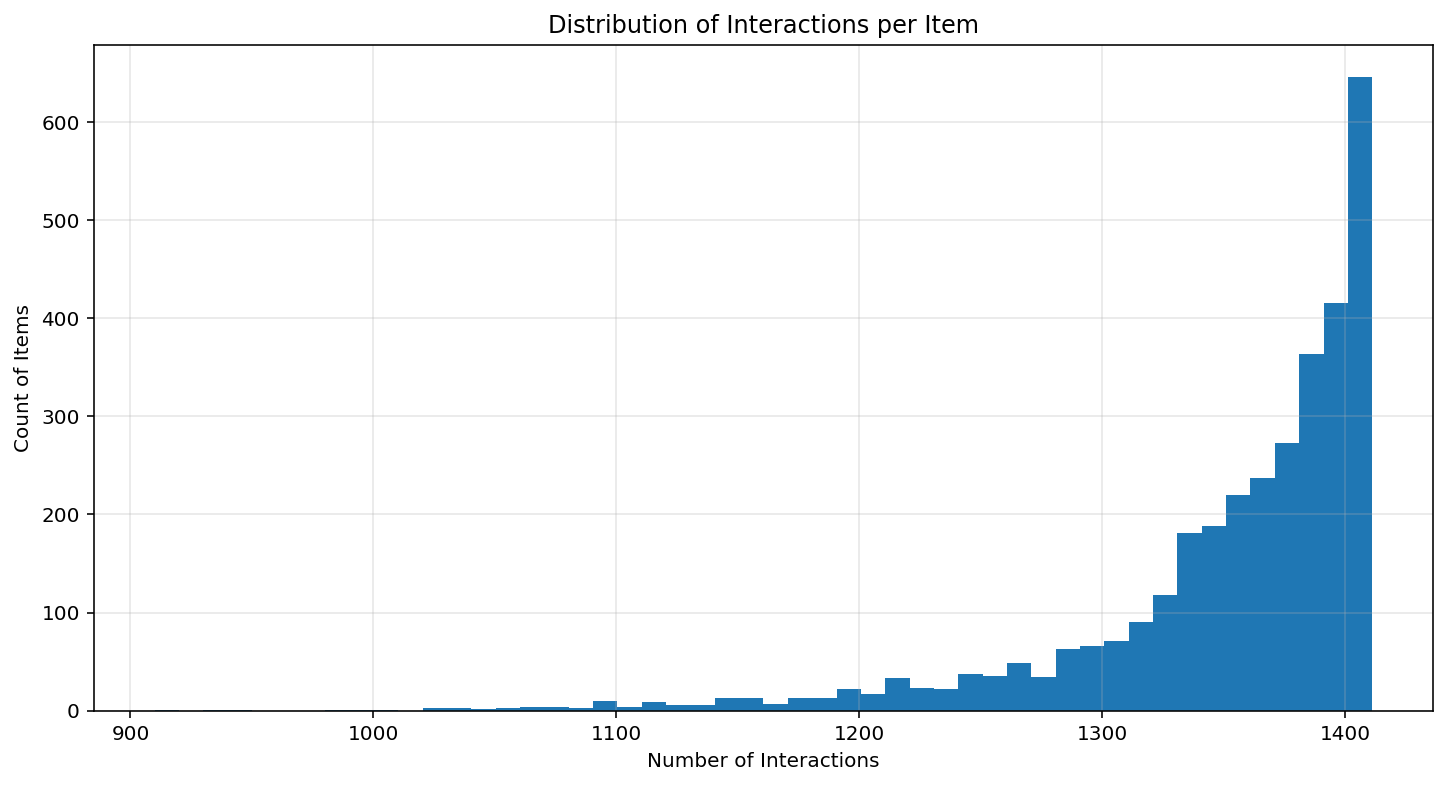

In [71]:
# Let's see the distribution of the interactions per item
item_counts = small_matrix["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")


# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()


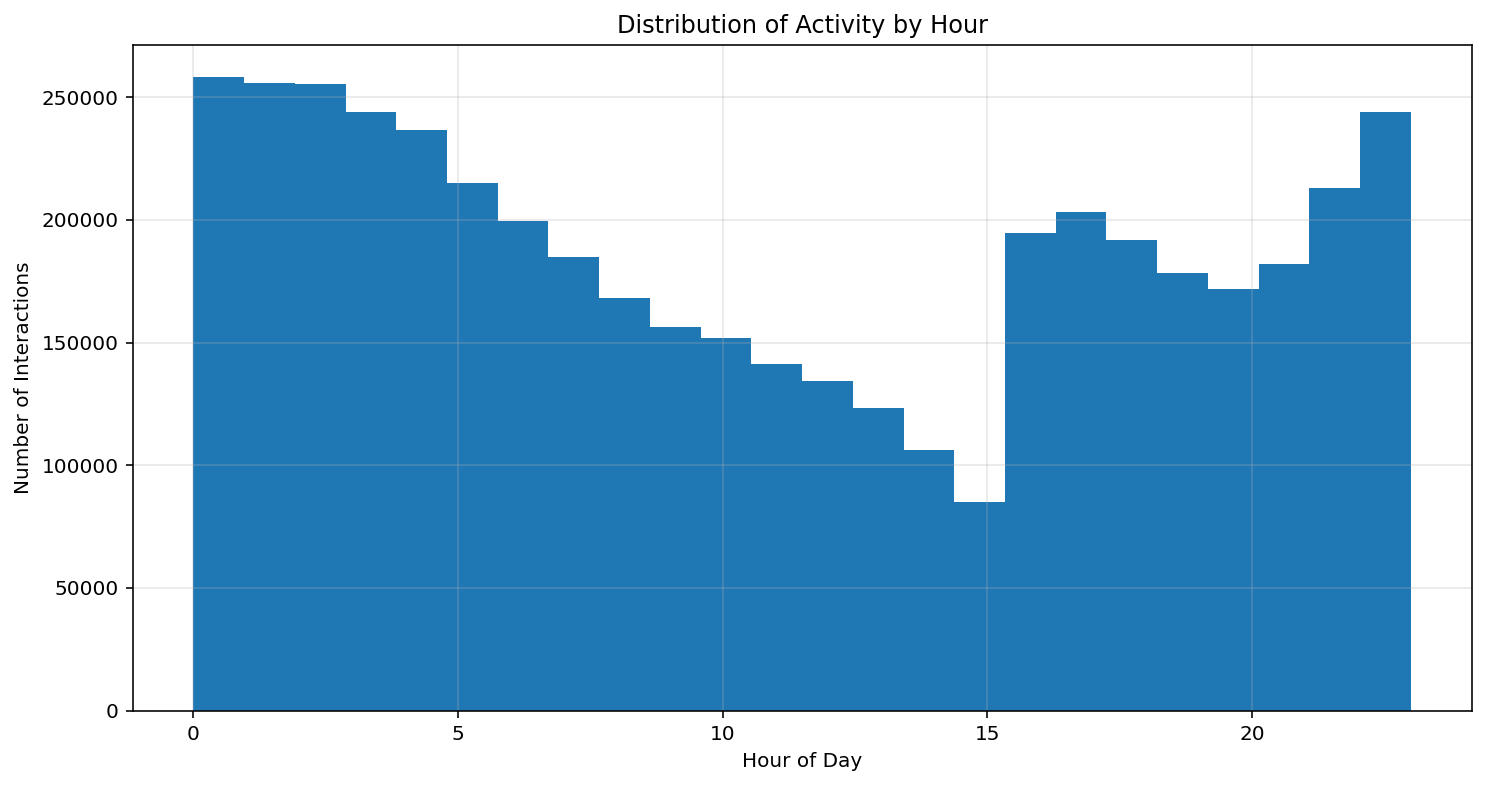

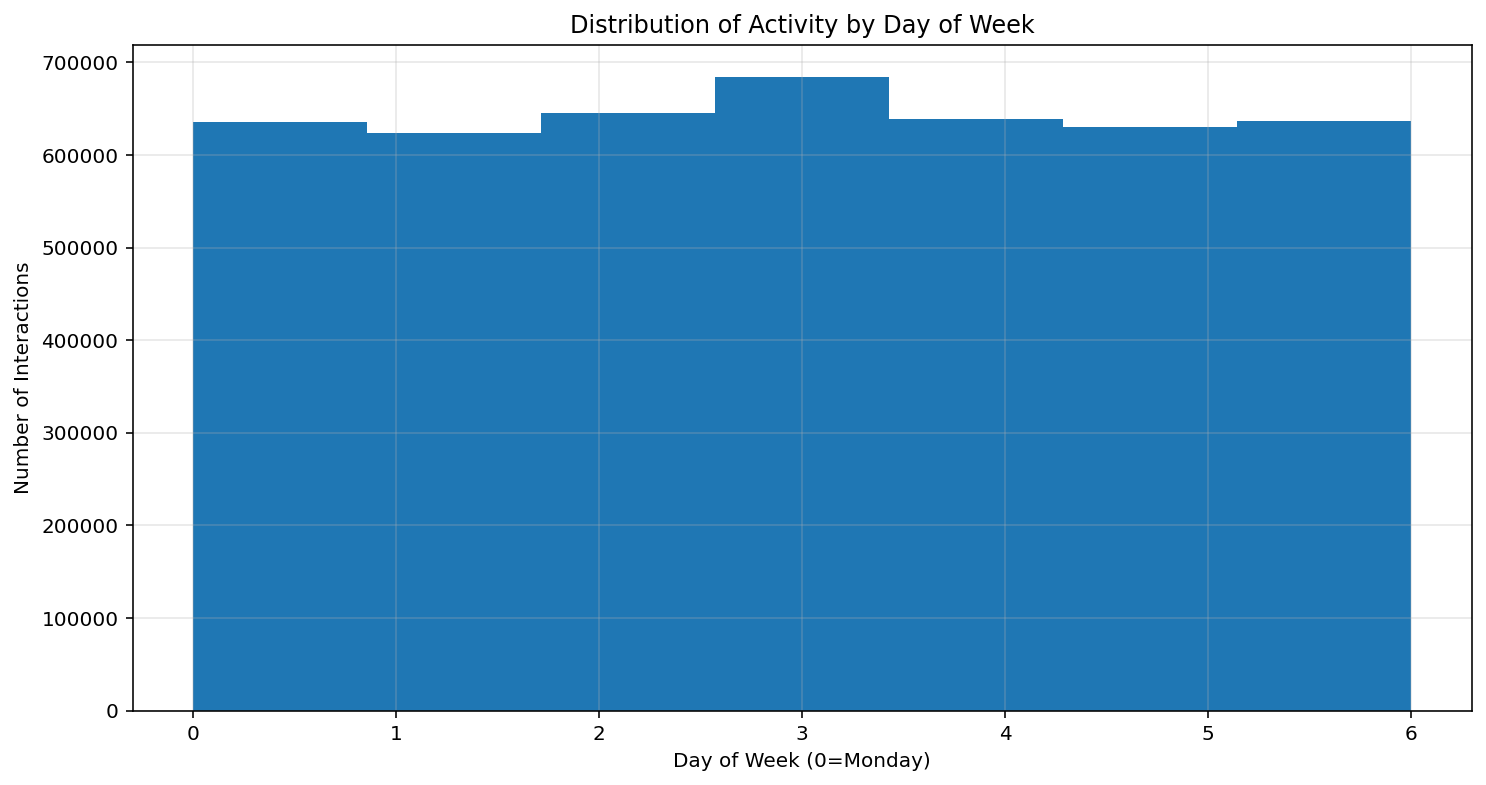

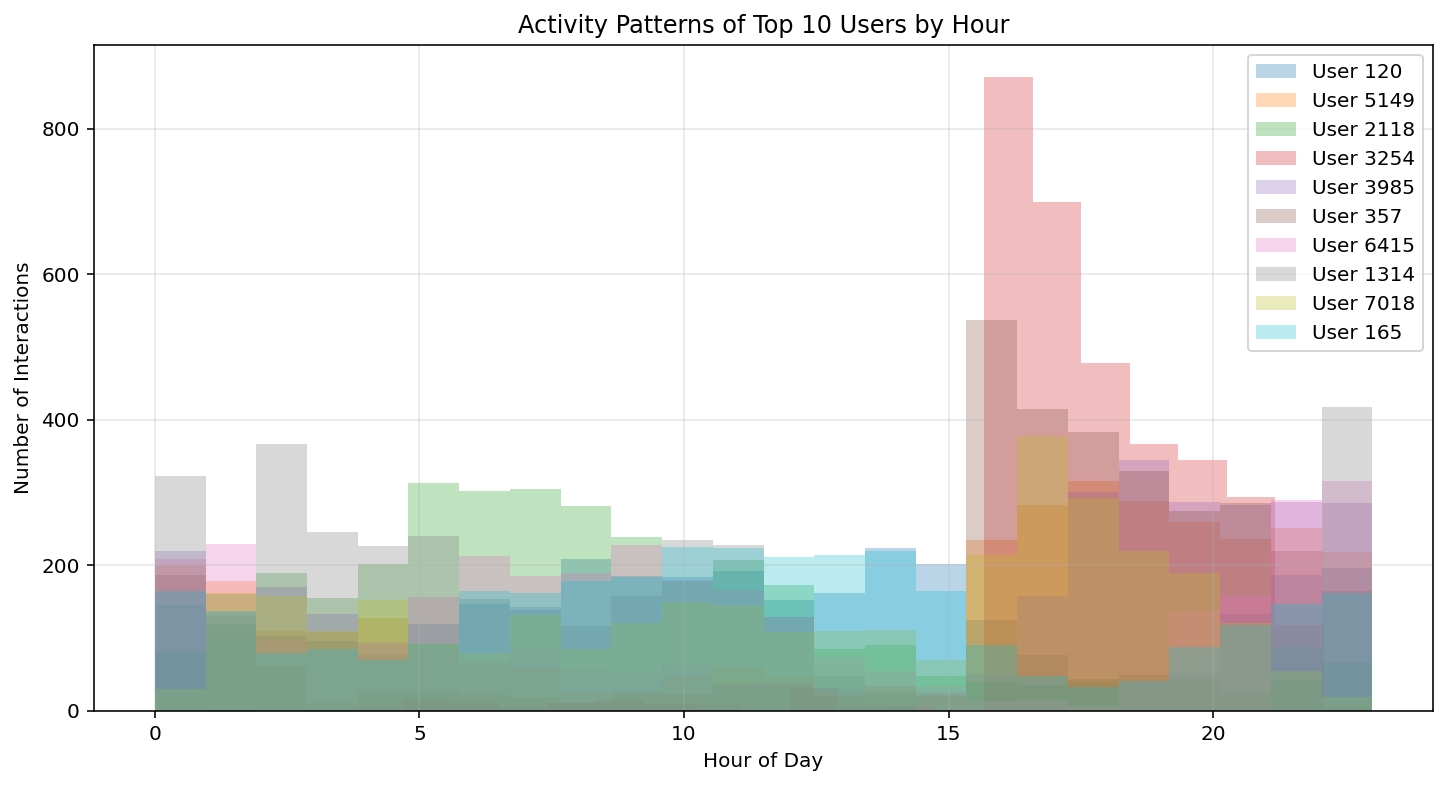


Peak Usage Hours:
Hour 0:00 - 258202 interactions
Hour 1:00 - 255557 interactions
Hour 2:00 - 255403 interactions

Peak Usage Days:
Thursday - 684255 interactions
Wednesday - 644928 interactions
Friday - 639221 interactions


In [72]:
# Convert timestamp to datetime
small_matrix["timestamp"] = pd.to_datetime(
    small_matrix["timestamp"].fillna(0), unit="s"
)

small_matrix["hour"] = small_matrix["timestamp"].dt.hour
small_matrix["day"] = small_matrix["timestamp"].dt.dayofweek

# Plot activity over time
plt.figure(figsize=(12, 6))
plt.hist(small_matrix["hour"], bins=24)
plt.title("Distribution of Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()


# Plot activity by day of week
plt.figure(figsize=(12, 6))
plt.hist(small_matrix["day"], bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Get top 10 most active users
top_users = small_matrix["user_id"].value_counts().head(10).index

# Plot activity patterns for top users
plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = small_matrix[small_matrix["user_id"] == user]
    plt.hist(user_data["hour"], bins=24, alpha=0.3, label=f"User {user}")
plt.title("Activity Patterns of Top 10 Users by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find peak usage times
hourly_activity = small_matrix.groupby("hour").size()
peak_hours = hourly_activity.nlargest(3)

print("\nPeak Usage Hours:")
for hour, count in peak_hours.items():
    print(f"Hour {hour}:00 - {count} interactions")

daily_activity = small_matrix.groupby("day").size()
peak_days = daily_activity.nlargest(3)

print("\nPeak Usage Days:")
for day, count in peak_days.items():
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    print(f"{days[int(day)]} - {count} interactions")

We can see that the general trend of activity is high all around the day with a drop during the afternoon. This is probably due to the fact that most people study/work in the afternoon at the same time

In [73]:
small_matrix.dtypes

user_id                    int64
video_id                   int64
play_duration              int64
video_duration             int64
time                      object
date                     float64
timestamp         datetime64[ns]
watch_ratio              float64
hour                       int32
day                        int32
dtype: object

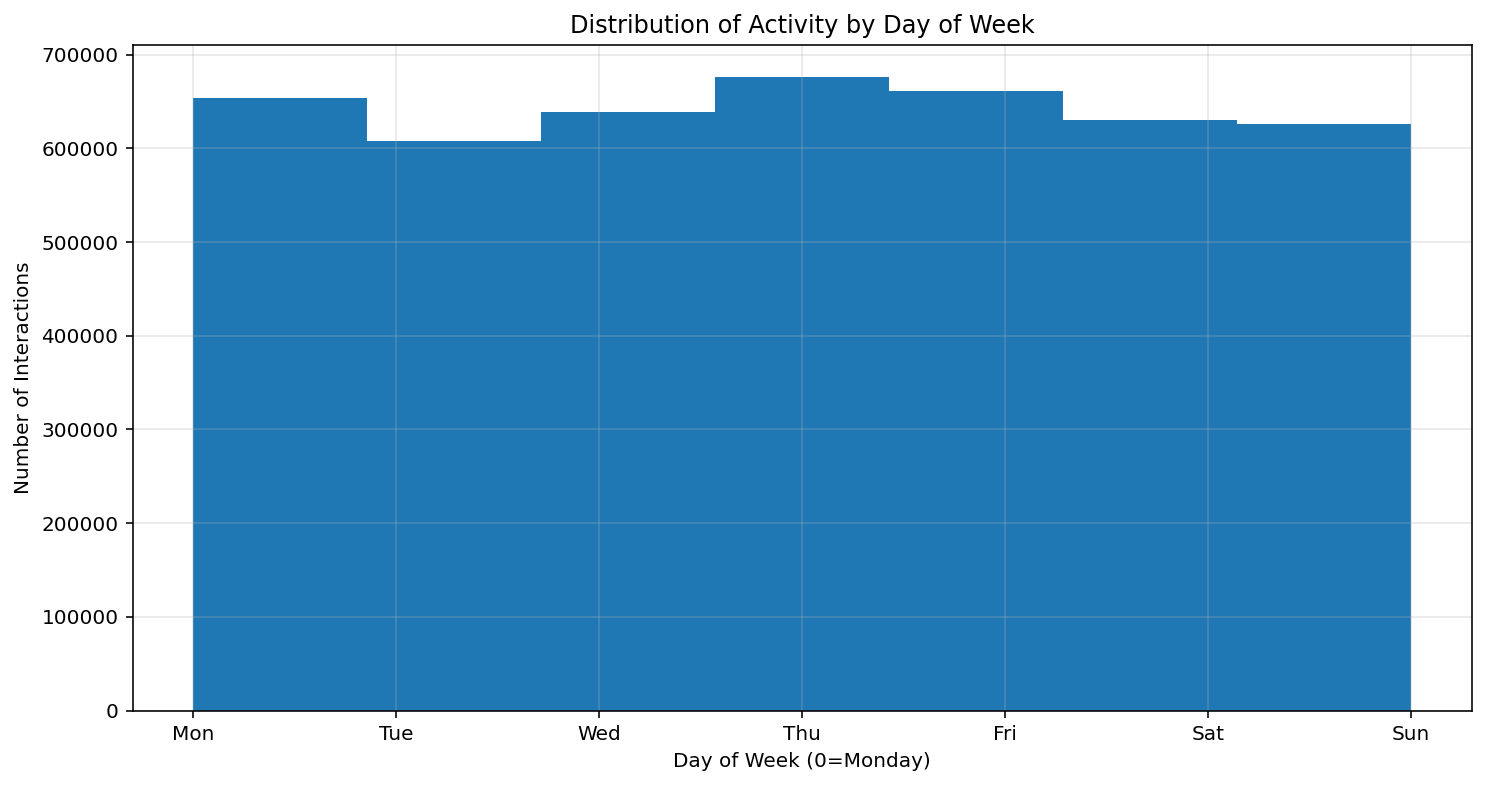

In [74]:
from datetime import datetime

# Plot activity by day of week
plt.figure(figsize=(12, 6))
small_matrix.dropna(inplace=True)
tmp = small_matrix['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').date().weekday())
# print(tmp)
plt.hist(tmp, bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
# plt.ylim(500000, 1000000)
plt.grid(True, alpha=0.3)
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

There is no big difference in activity across the week

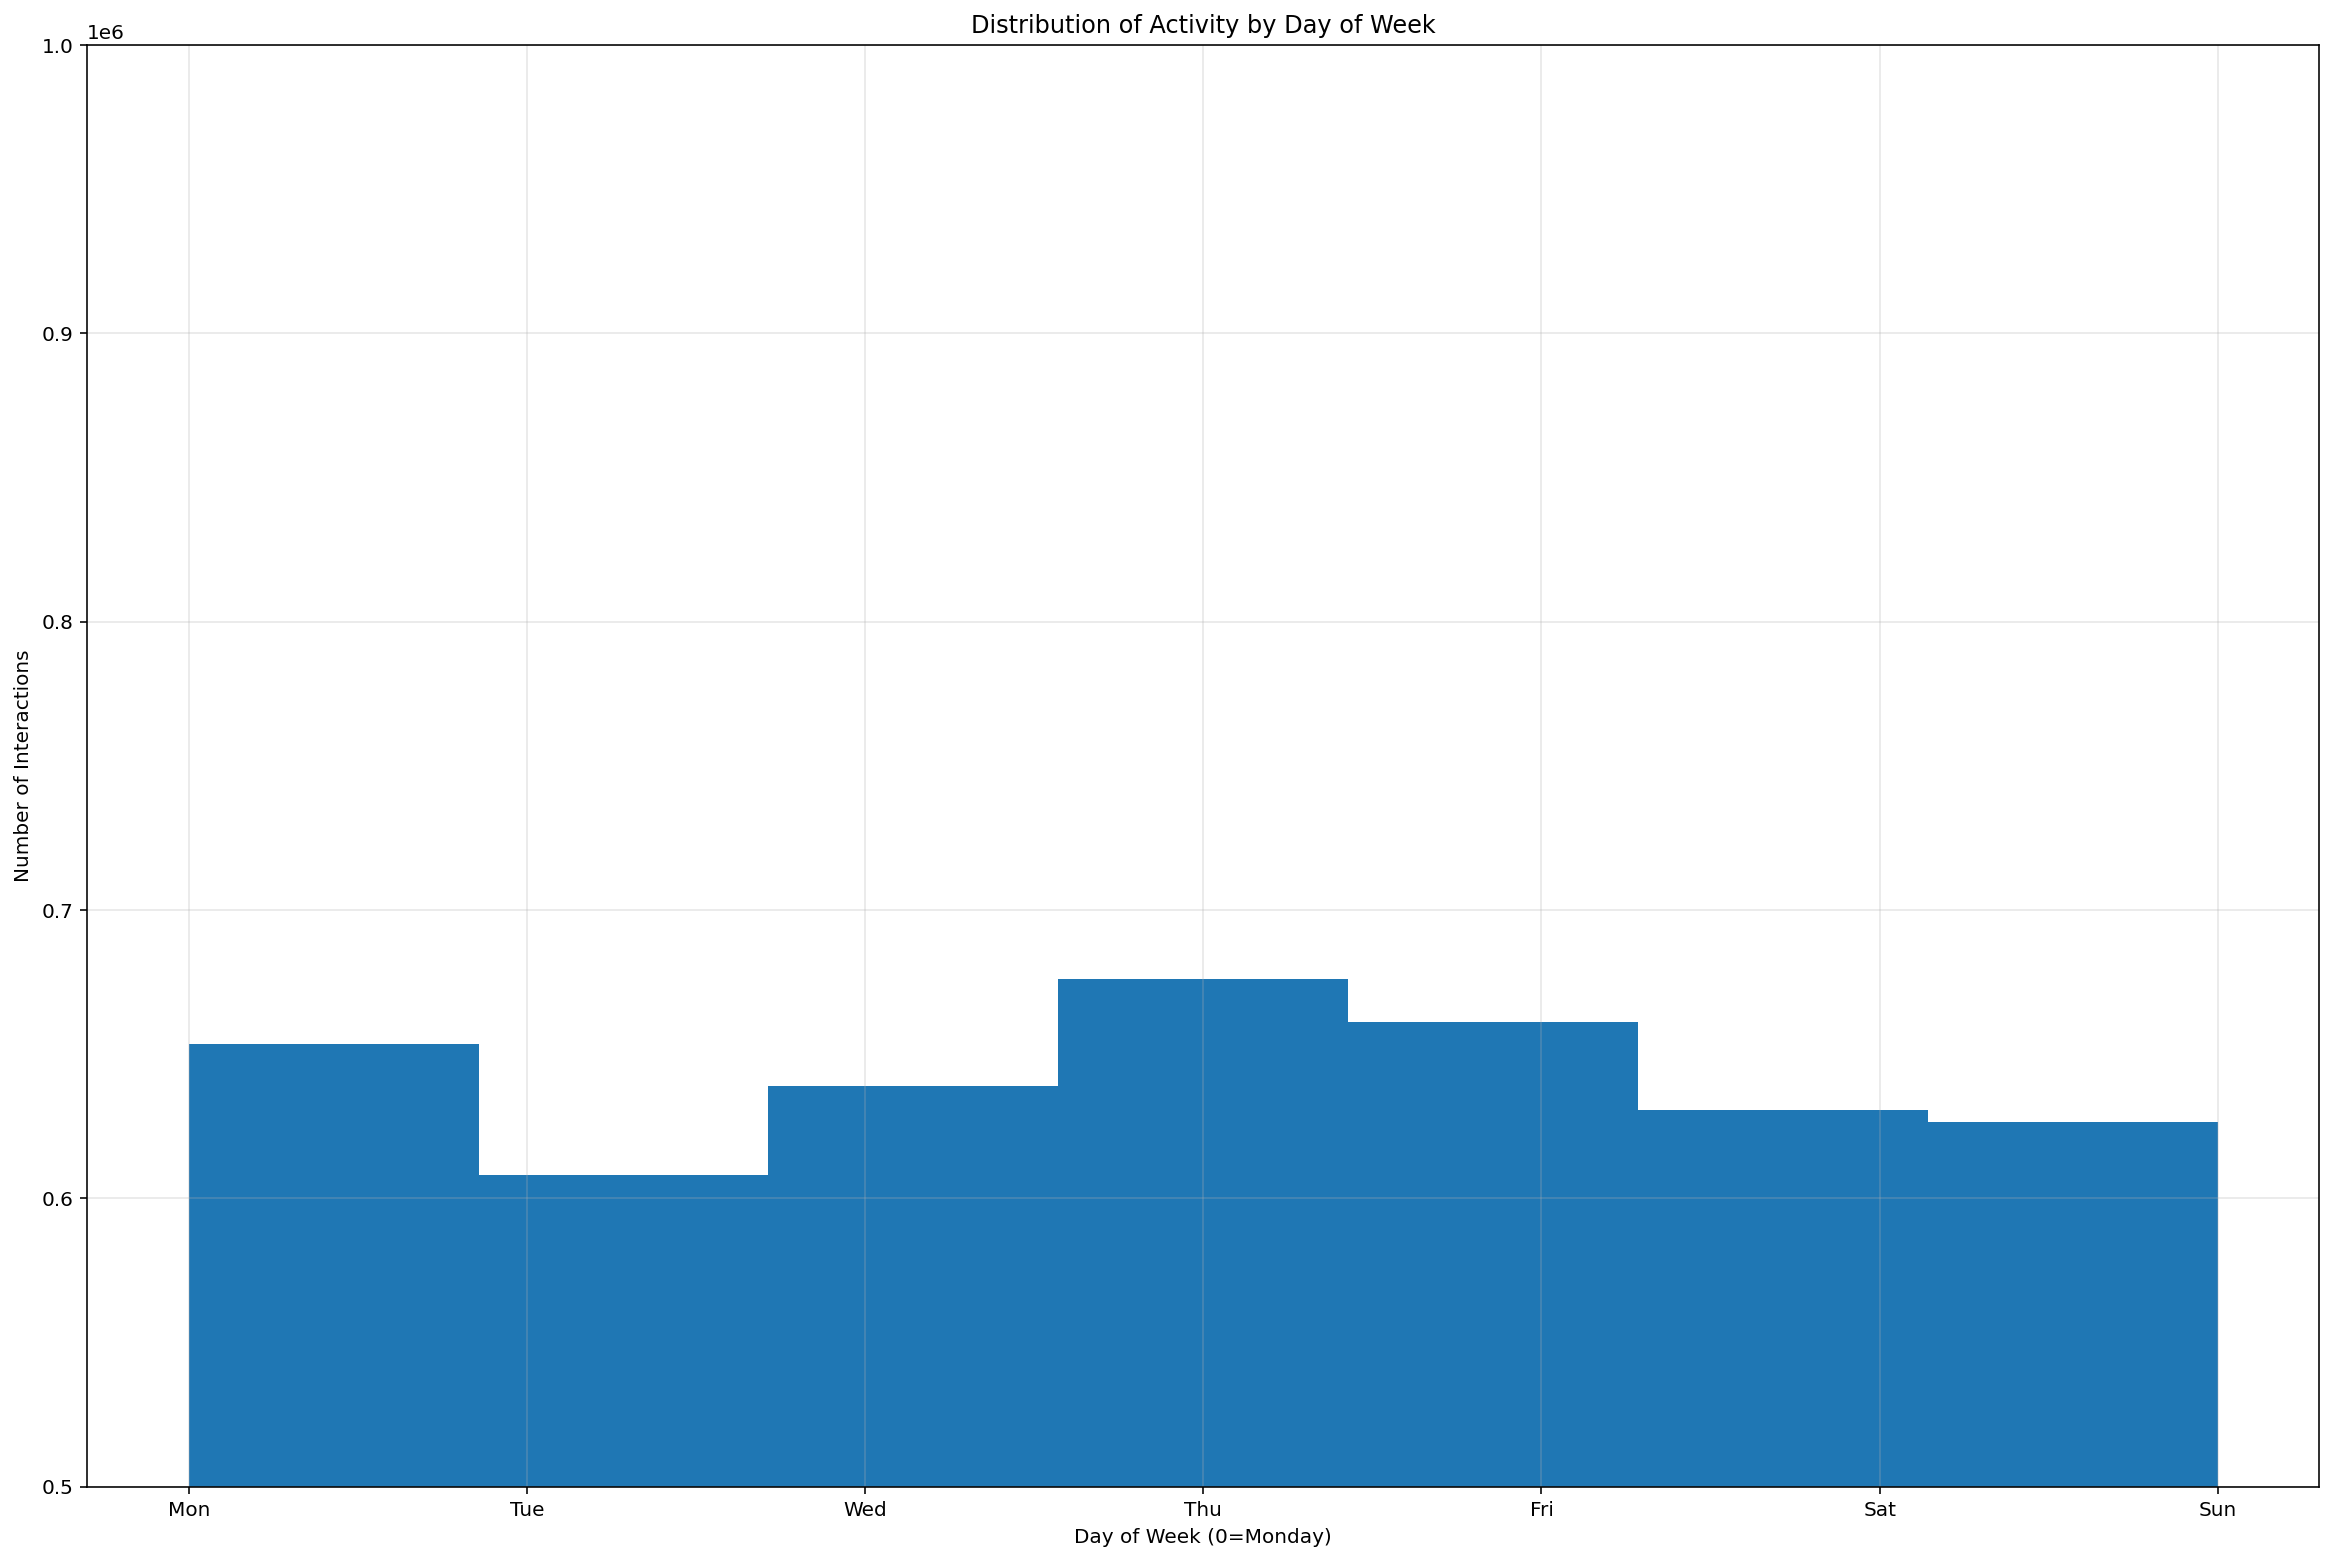

In [75]:
plt.hist(tmp, bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.ylim(500000, 1000000)
plt.grid(True, alpha=0.3)
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

#### Main interactions statistics

In [76]:
display(small_matrix["watch_ratio"].describe())
small_matrix["video_duration"].describe()

count    4.494578e+06
mean     9.113757e-01
std      1.356487e+00
min      0.000000e+00
25%      4.735875e-01
50%      7.745146e-01
75%      1.124976e+00
max      5.715214e+02
Name: watch_ratio, dtype: float64

count    4.494578e+06
mean     1.422409e+04
std      1.989596e+04
min      3.067000e+03
25%      7.500000e+03
50%      9.560000e+03
75%      1.181900e+04
max      3.150720e+05
Name: video_duration, dtype: float64

---
## Big Matrix Data Analysis

Same analysis as above, but for the big matrix.

In [77]:
# Normally already done in the data cleaning step

# remove the rows with missing values
big_matrix = big_matrix.dropna()
# remove the duplicates
big_matrix = big_matrix.drop_duplicates()
# remove the rows with negative timestamps
big_matrix = big_matrix[big_matrix["timestamp"] >= 0]


User counts from big_matrix:
user_id
3133    15283
4247     8478
1092     5675
4117     5663
3655     5440
3287     5433
3586     5417
1657     5284
6468     5063
3650     4956
Name: count, dtype: int64

User counts from small_matrix:
user_id
120     3302
5149    3299
2118    3298
3254    3295
3985    3295
357     3294
6415    3294
1314    3293
7018    3292
165     3291
Name: count, dtype: int64


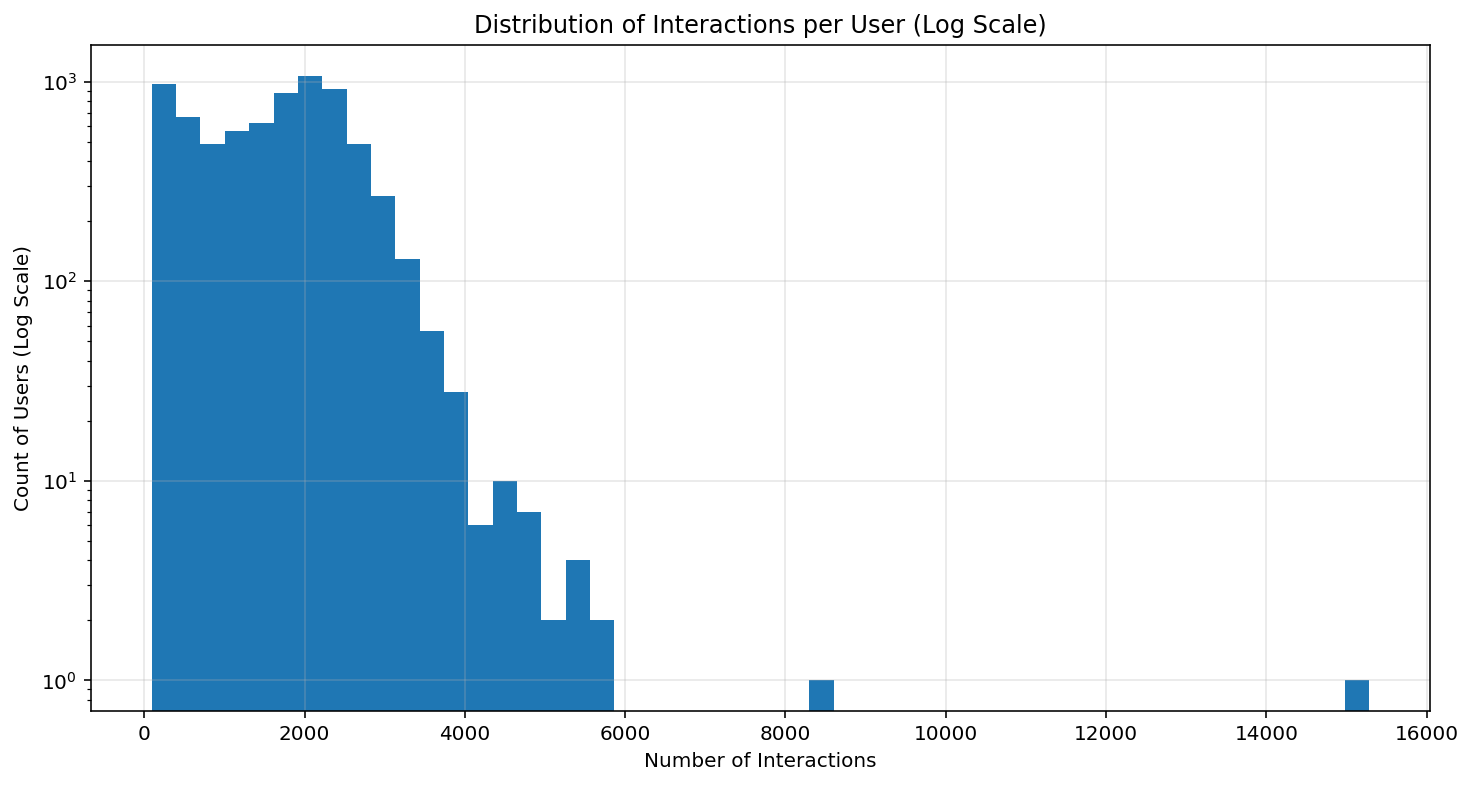

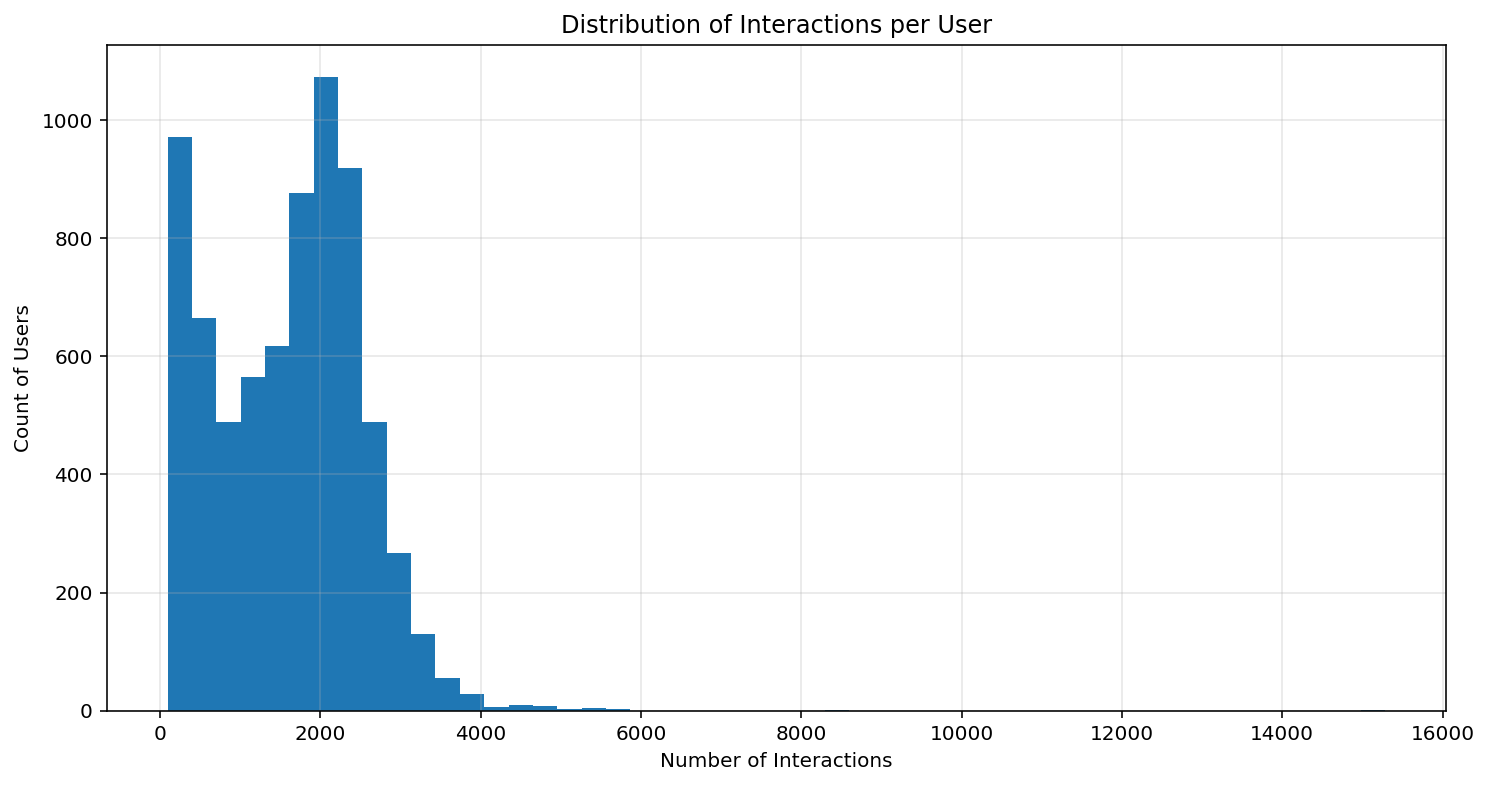

In [78]:
# Get counts per user from big_matrix and small_matrix
user_counts = big_matrix["user_id"].value_counts()
# Display the first 10 user counts
print("\nUser counts from big_matrix:")
print(user_counts.head(10))

user_counts_small = small_matrix["user_id"].value_counts()
print("\nUser counts from small_matrix:")
print(user_counts_small.head(10))

# Since there can be users that can be in only one of the two matrices, we can merge them
# to see the difference in the number of interactions
# Corrected merge operation:
# Merge on 'user_id' and add suffixes to distinguish the count columns
merged_counts = pd.merge(
    user_counts.reset_index(), 
    user_counts_small.reset_index(), 
    on="user_id",  # Changed from "index" to "user_id"
    how="outer",
    suffixes=('_big', '_small') # Adds suffixes to count columns from each df
)

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

As we can see in those graphs, most users have less than 2000 interactions in the big matrix of interactions

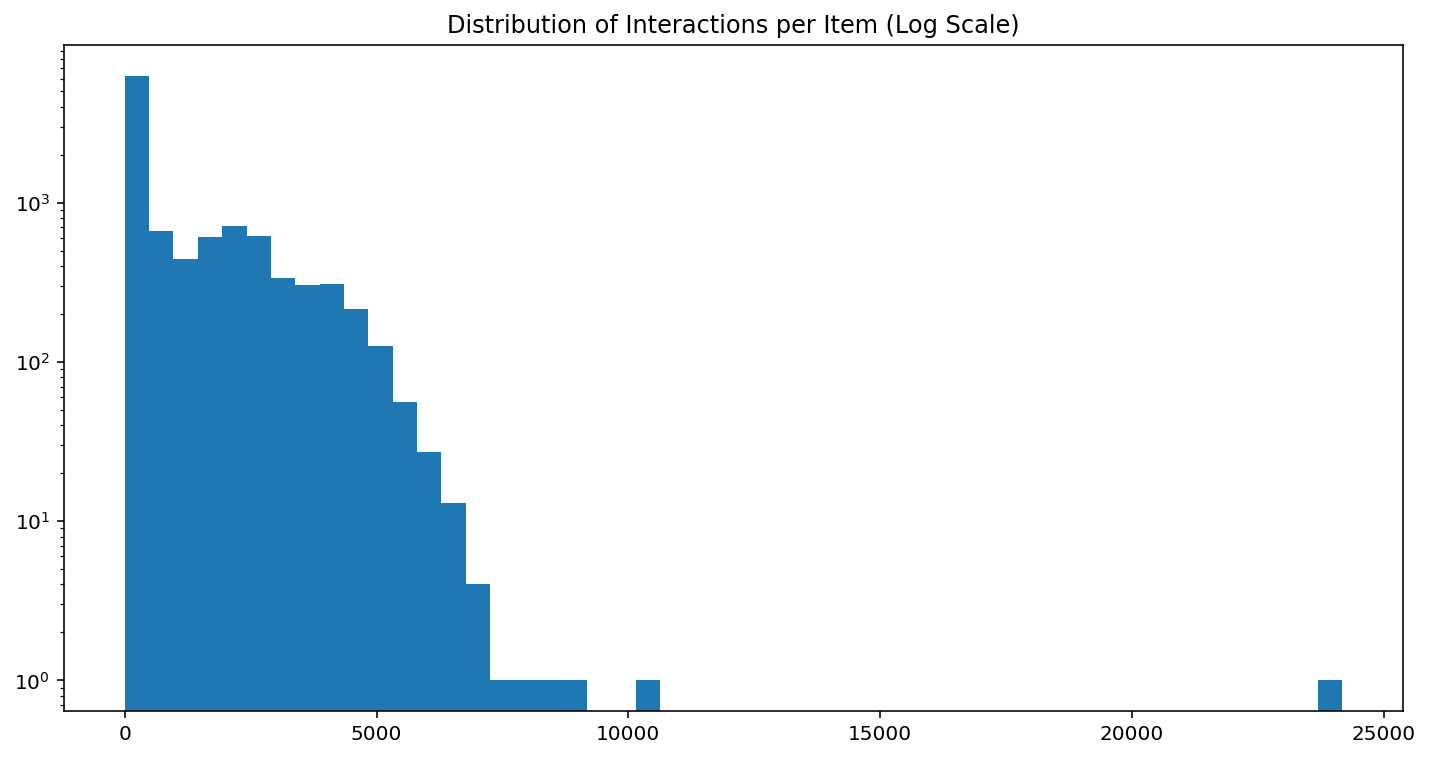

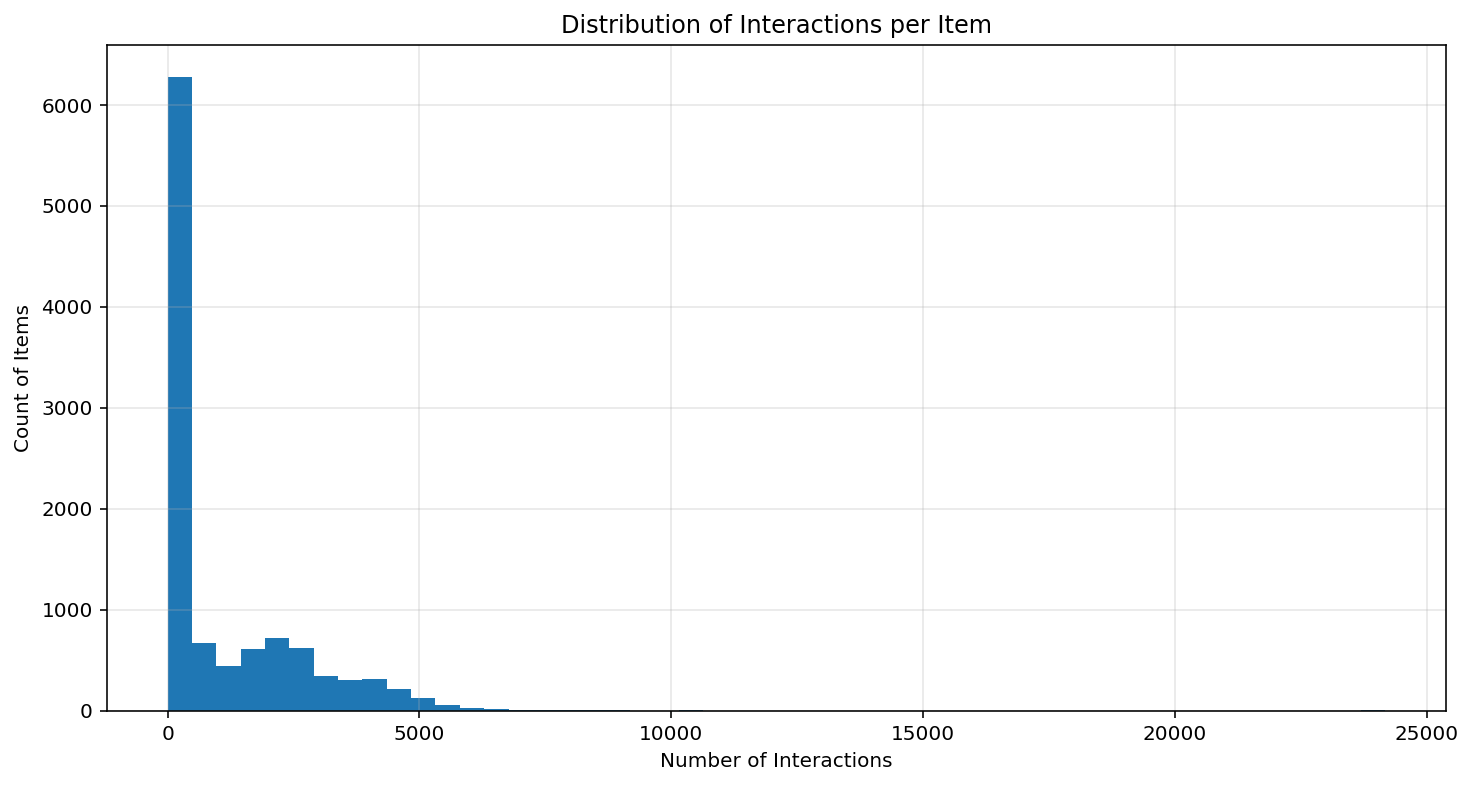

In [79]:
# Let's see the distribution of the interactions per item
item_counts = big_matrix["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

As expected, most videos have few to no interactions. This is normal as there are way more videos than users on the platform

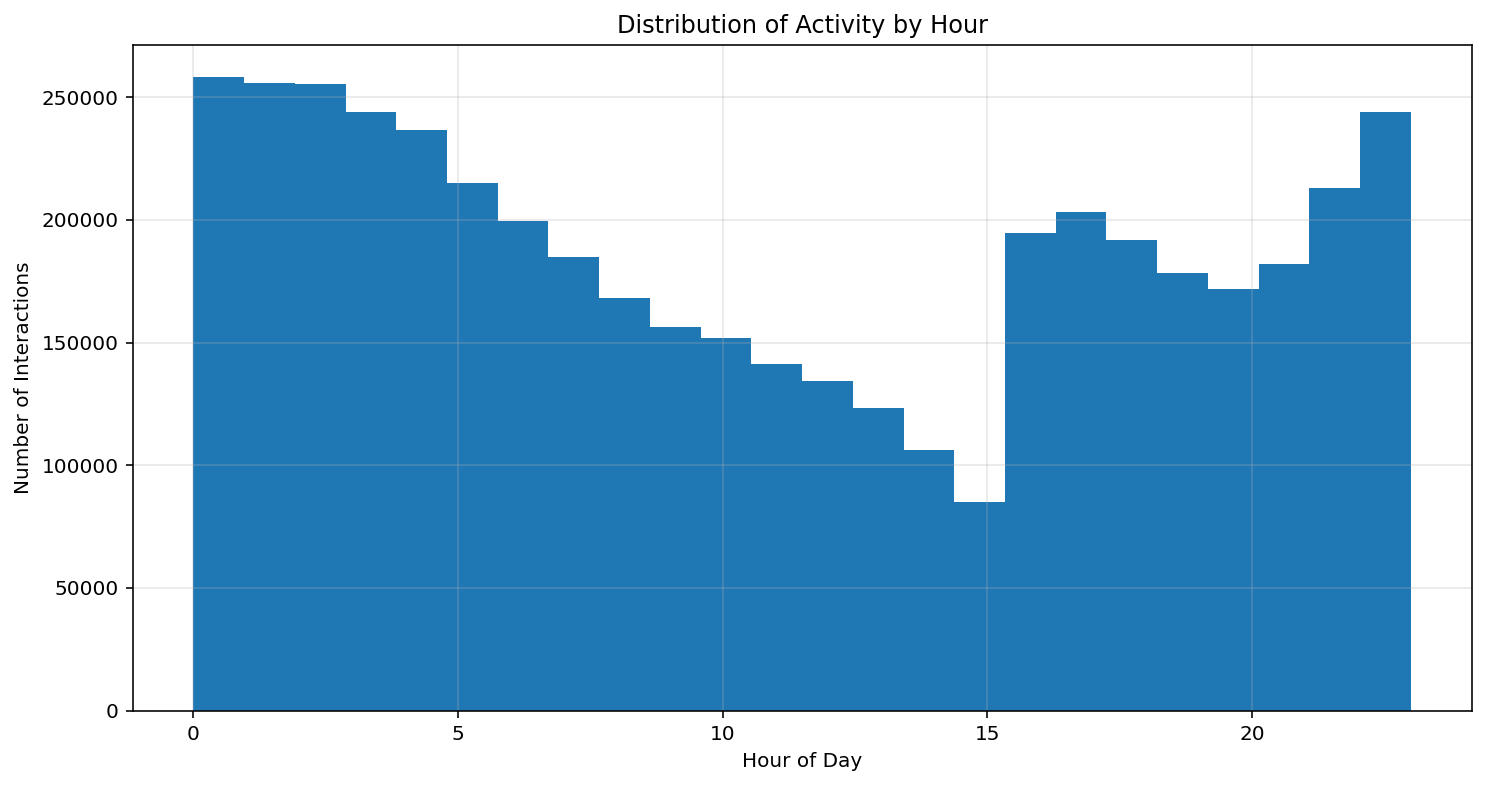

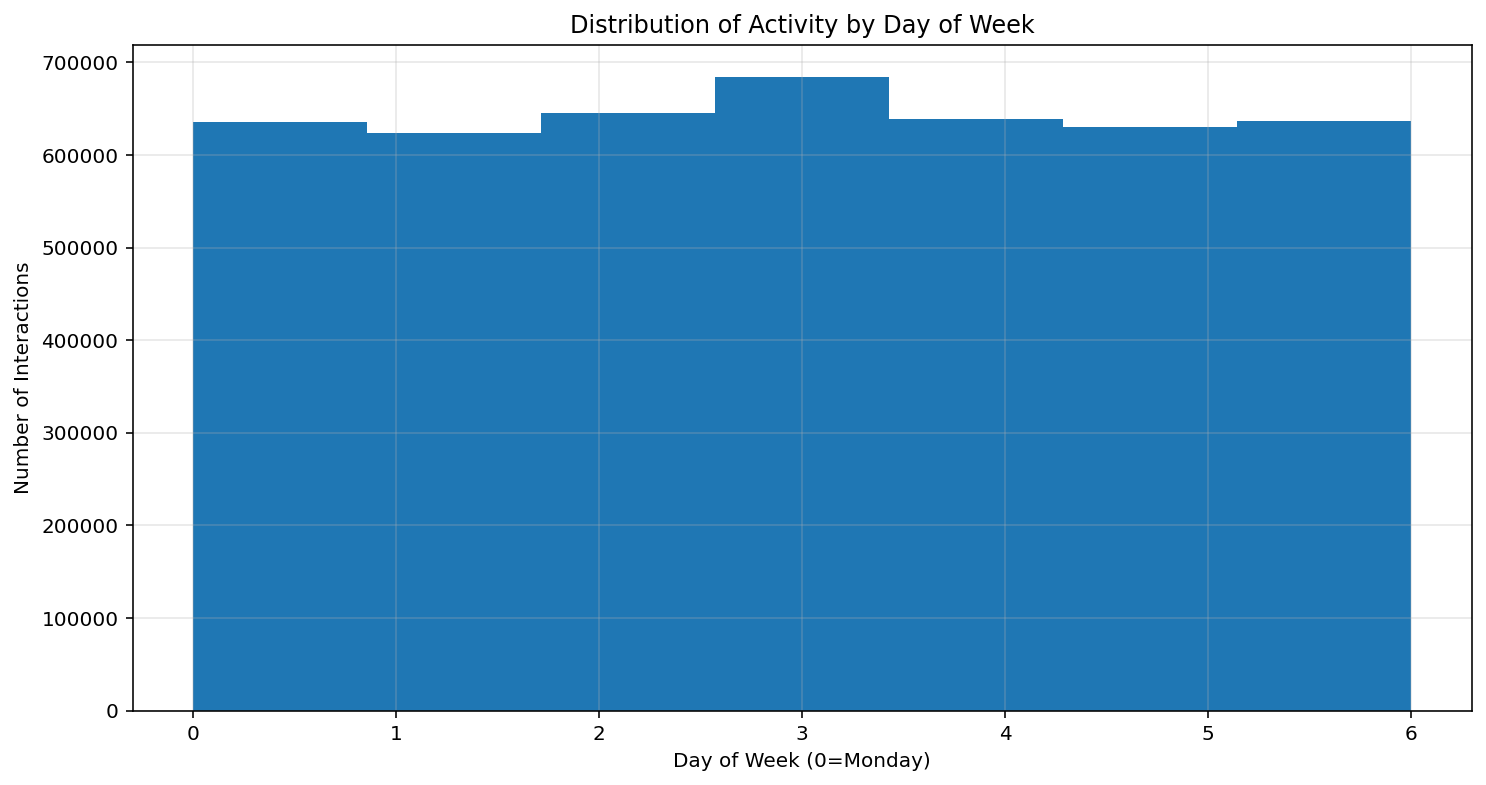

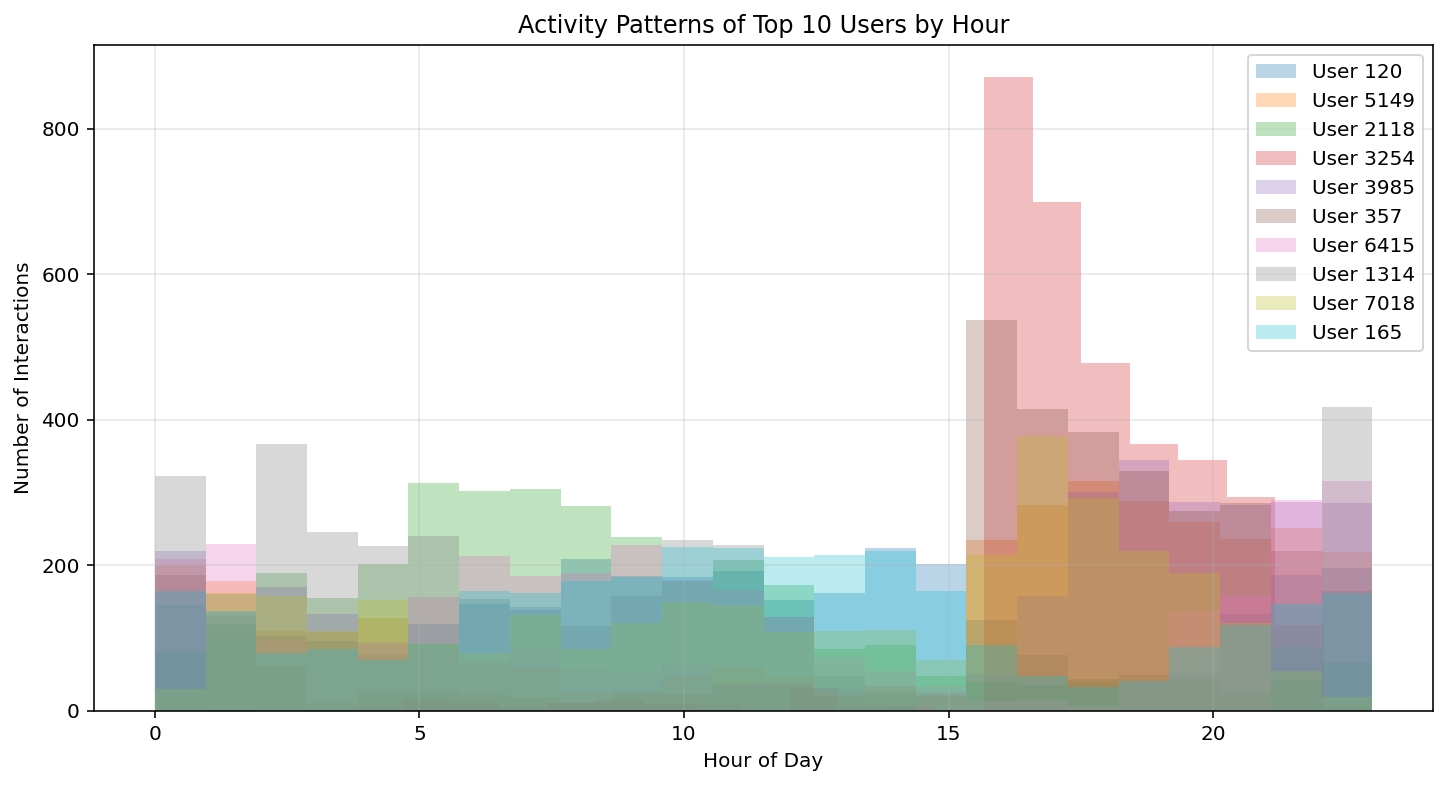


Peak Usage Hours:
Hour 0:00 - 258202 interactions
Hour 1:00 - 255557 interactions
Hour 2:00 - 255403 interactions

Peak Usage Days:
Thursday - 684255 interactions
Wednesday - 644928 interactions
Friday - 639221 interactions


In [80]:
# Convert timestamp to datetime
small_matrix["timestamp"] = pd.to_datetime(
    small_matrix["timestamp"].fillna(0), unit="s"
)

small_matrix["hour"] = small_matrix["timestamp"].dt.hour
small_matrix["day"] = small_matrix["timestamp"].dt.dayofweek

# Plot activity over time
plt.figure(figsize=(12, 6))
plt.hist(small_matrix["hour"], bins=24)
plt.title("Distribution of Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Plot activity by day of week
plt.figure(figsize=(12, 6))
plt.hist(small_matrix["day"], bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Get top 10 most active users
top_users = small_matrix["user_id"].value_counts().head(10).index

# Plot activity patterns for top users
plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = small_matrix[small_matrix["user_id"] == user]
    plt.hist(user_data["hour"], bins=24, alpha=0.3, label=f"User {user}")
plt.title("Activity Patterns of Top 10 Users by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find peak usage times
hourly_activity = small_matrix.groupby("hour").size()
peak_hours = hourly_activity.nlargest(3)

print("\nPeak Usage Hours:")
for hour, count in peak_hours.items():
    print(f"Hour {hour}:00 - {count} interactions")

daily_activity = small_matrix.groupby("day").size()
peak_days = daily_activity.nlargest(3)

print("\nPeak Usage Days:")
for day, count in peak_days.items():
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    print(f"{days[int(day)]} - {count} interactions")

- We can observe a similar trend than above where activity dips a little during the afternoon and then corrects itself just before the evening
- Here we can observe that there is an activity peak on wednesdays, maybe this is due to the fact that kids have partially to no school on wednesdays

### Check sparsity of big_matrix

In [81]:
n_users = big_matrix['user_id'].nunique()
n_items = big_matrix['video_id'].nunique()
sparsity = 1 - (len(big_matrix) / (n_users * n_items))
print(f"Sparsity of the matrix: {sparsity:.4f}")

Sparsity of the matrix: 0.8498


---

### User Data Analysis

Do a certain type of user interact more ?

<Axes: xlabel='onehot_feat4'>

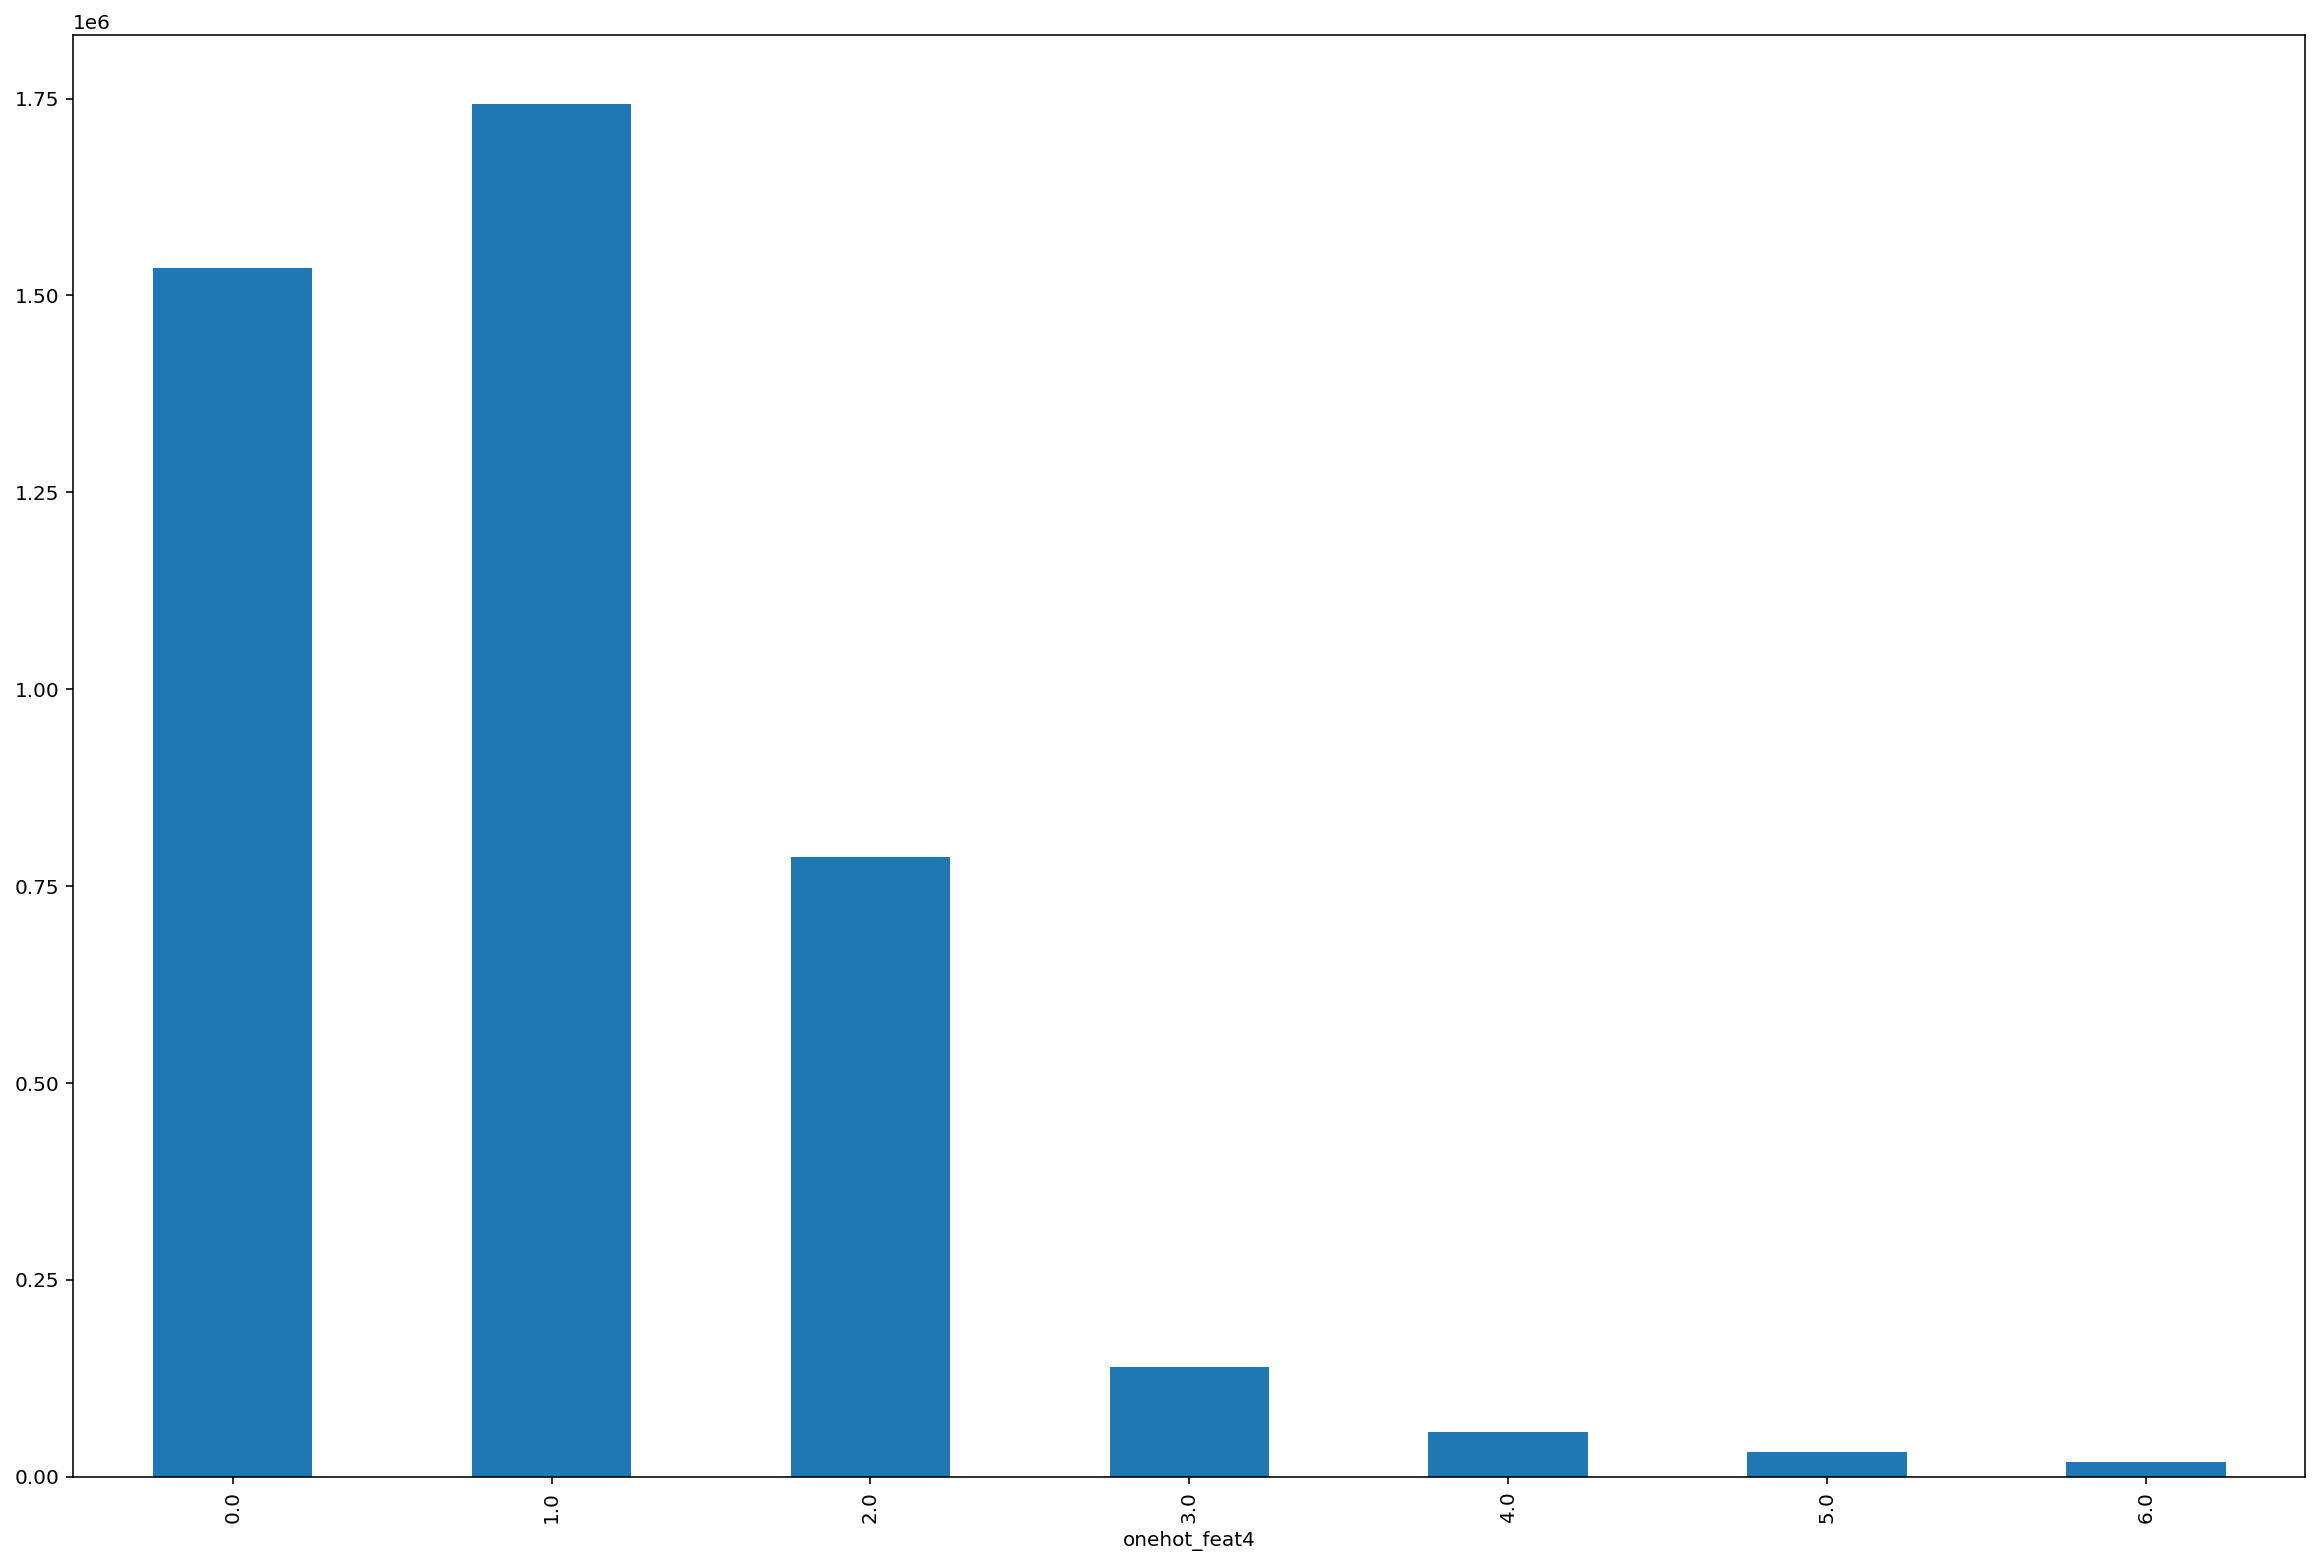

In [82]:
user_features.isnull().sum()
user_features.head()

# Check the distribution for onehot_feat4
user_features.merge(small_matrix, on='user_id').groupby('onehot_feat4')['video_id'].count().plot(kind='bar')
# user_features.merge(big_matrix, on='user_id').groupby('onehot_feat4')['video_id'].count().plot(kind='bar')

---

## Item Category Data Analysis

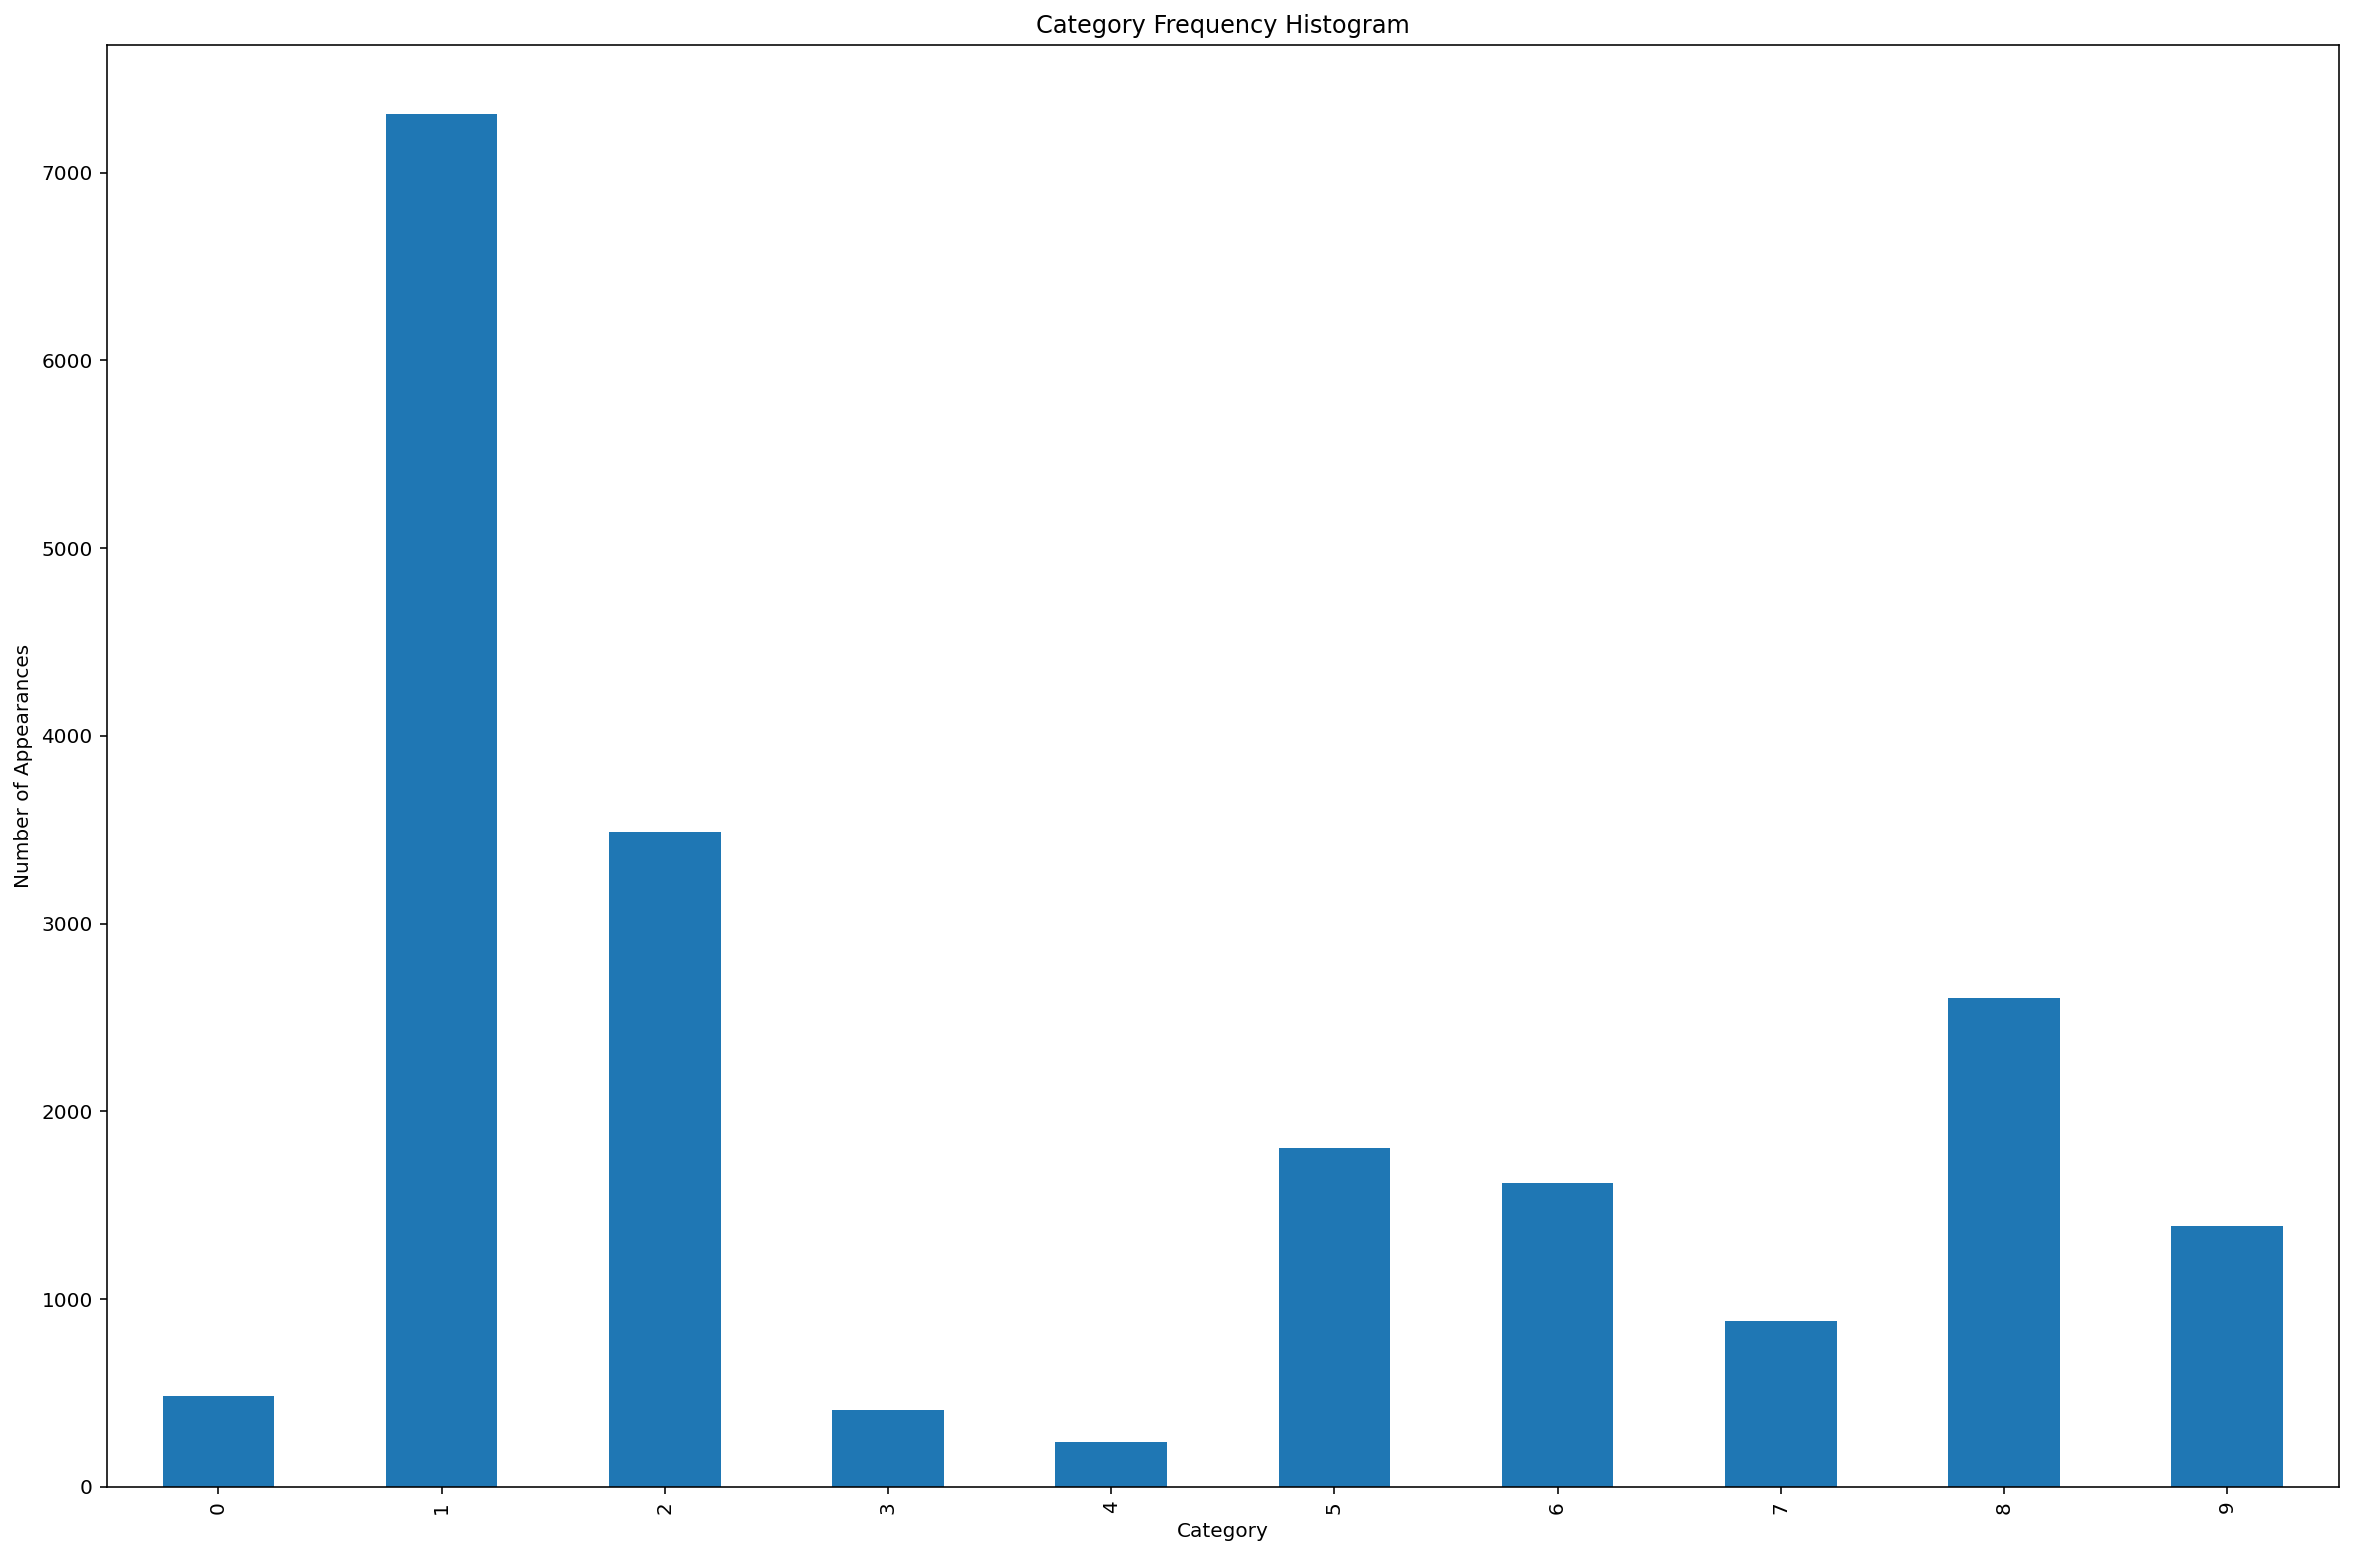

In [83]:
from collections import Counter
import itertools

# Plot the distribution of the categorical feature
all_categories = list(itertools.chain.from_iterable(item_categories['feat']))

category_counts = Counter(all_categories)

# Remove non digit characters
category_counts = {k: v for k, v in category_counts.items() if str(k).isdigit()}
category_series = pd.Series(category_counts).sort_index()

category_series.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Appearances')
plt.title('Category Frequency Histogram')
plt.show()


In [84]:
caption_category.head()

,video_id,manual_cover_text,caption,topic_tag,first_level_category_id,first_level_category_name,second_level_category_id,second_level_category_name,third_level_category_id,third_level_category_name
0,0,UNKNOWN,精神小伙路难走 程哥你狗粮慢点撒,[],8.0,颜值,673.0,颜值随拍,-124.0,UNKNOWN
2,2,UNKNOWN,晚饭后，运动一下！,[],9.0,喜剧,727.0,搞笑互动,-124.0,UNKNOWN
3,3,UNKNOWN,我平淡无奇，惊艳不了时光，温柔不了岁月，我只想漫无目的的走走，努力发笔小财，给自己买花 自己长大.,[],26.0,摄影,686.0,主题摄影,2434.0,景物摄影
4,4,五爱街最美美女 一天1q,#搞笑 #感谢快手我要上热门 #五爱市场 这真是完美搭配啊！,"[五爱市场,感谢快手我要上热门,搞笑]",5.0,时尚,737.0,营销售卖,2596.0,女装
5,5,UNKNOWN,“你们吵的越狠 他们的手就握的越紧” #文轩 #刘耀文 #宋亚轩 #顾子璇...,"[刘耀文,宋亚轩,文轩,顾子璇是樱桃吖,顾子璇超级喜欢文轩]",6.0,明星娱乐,667.0,娱乐八卦,2375.0,饭制


---

## Daily item features

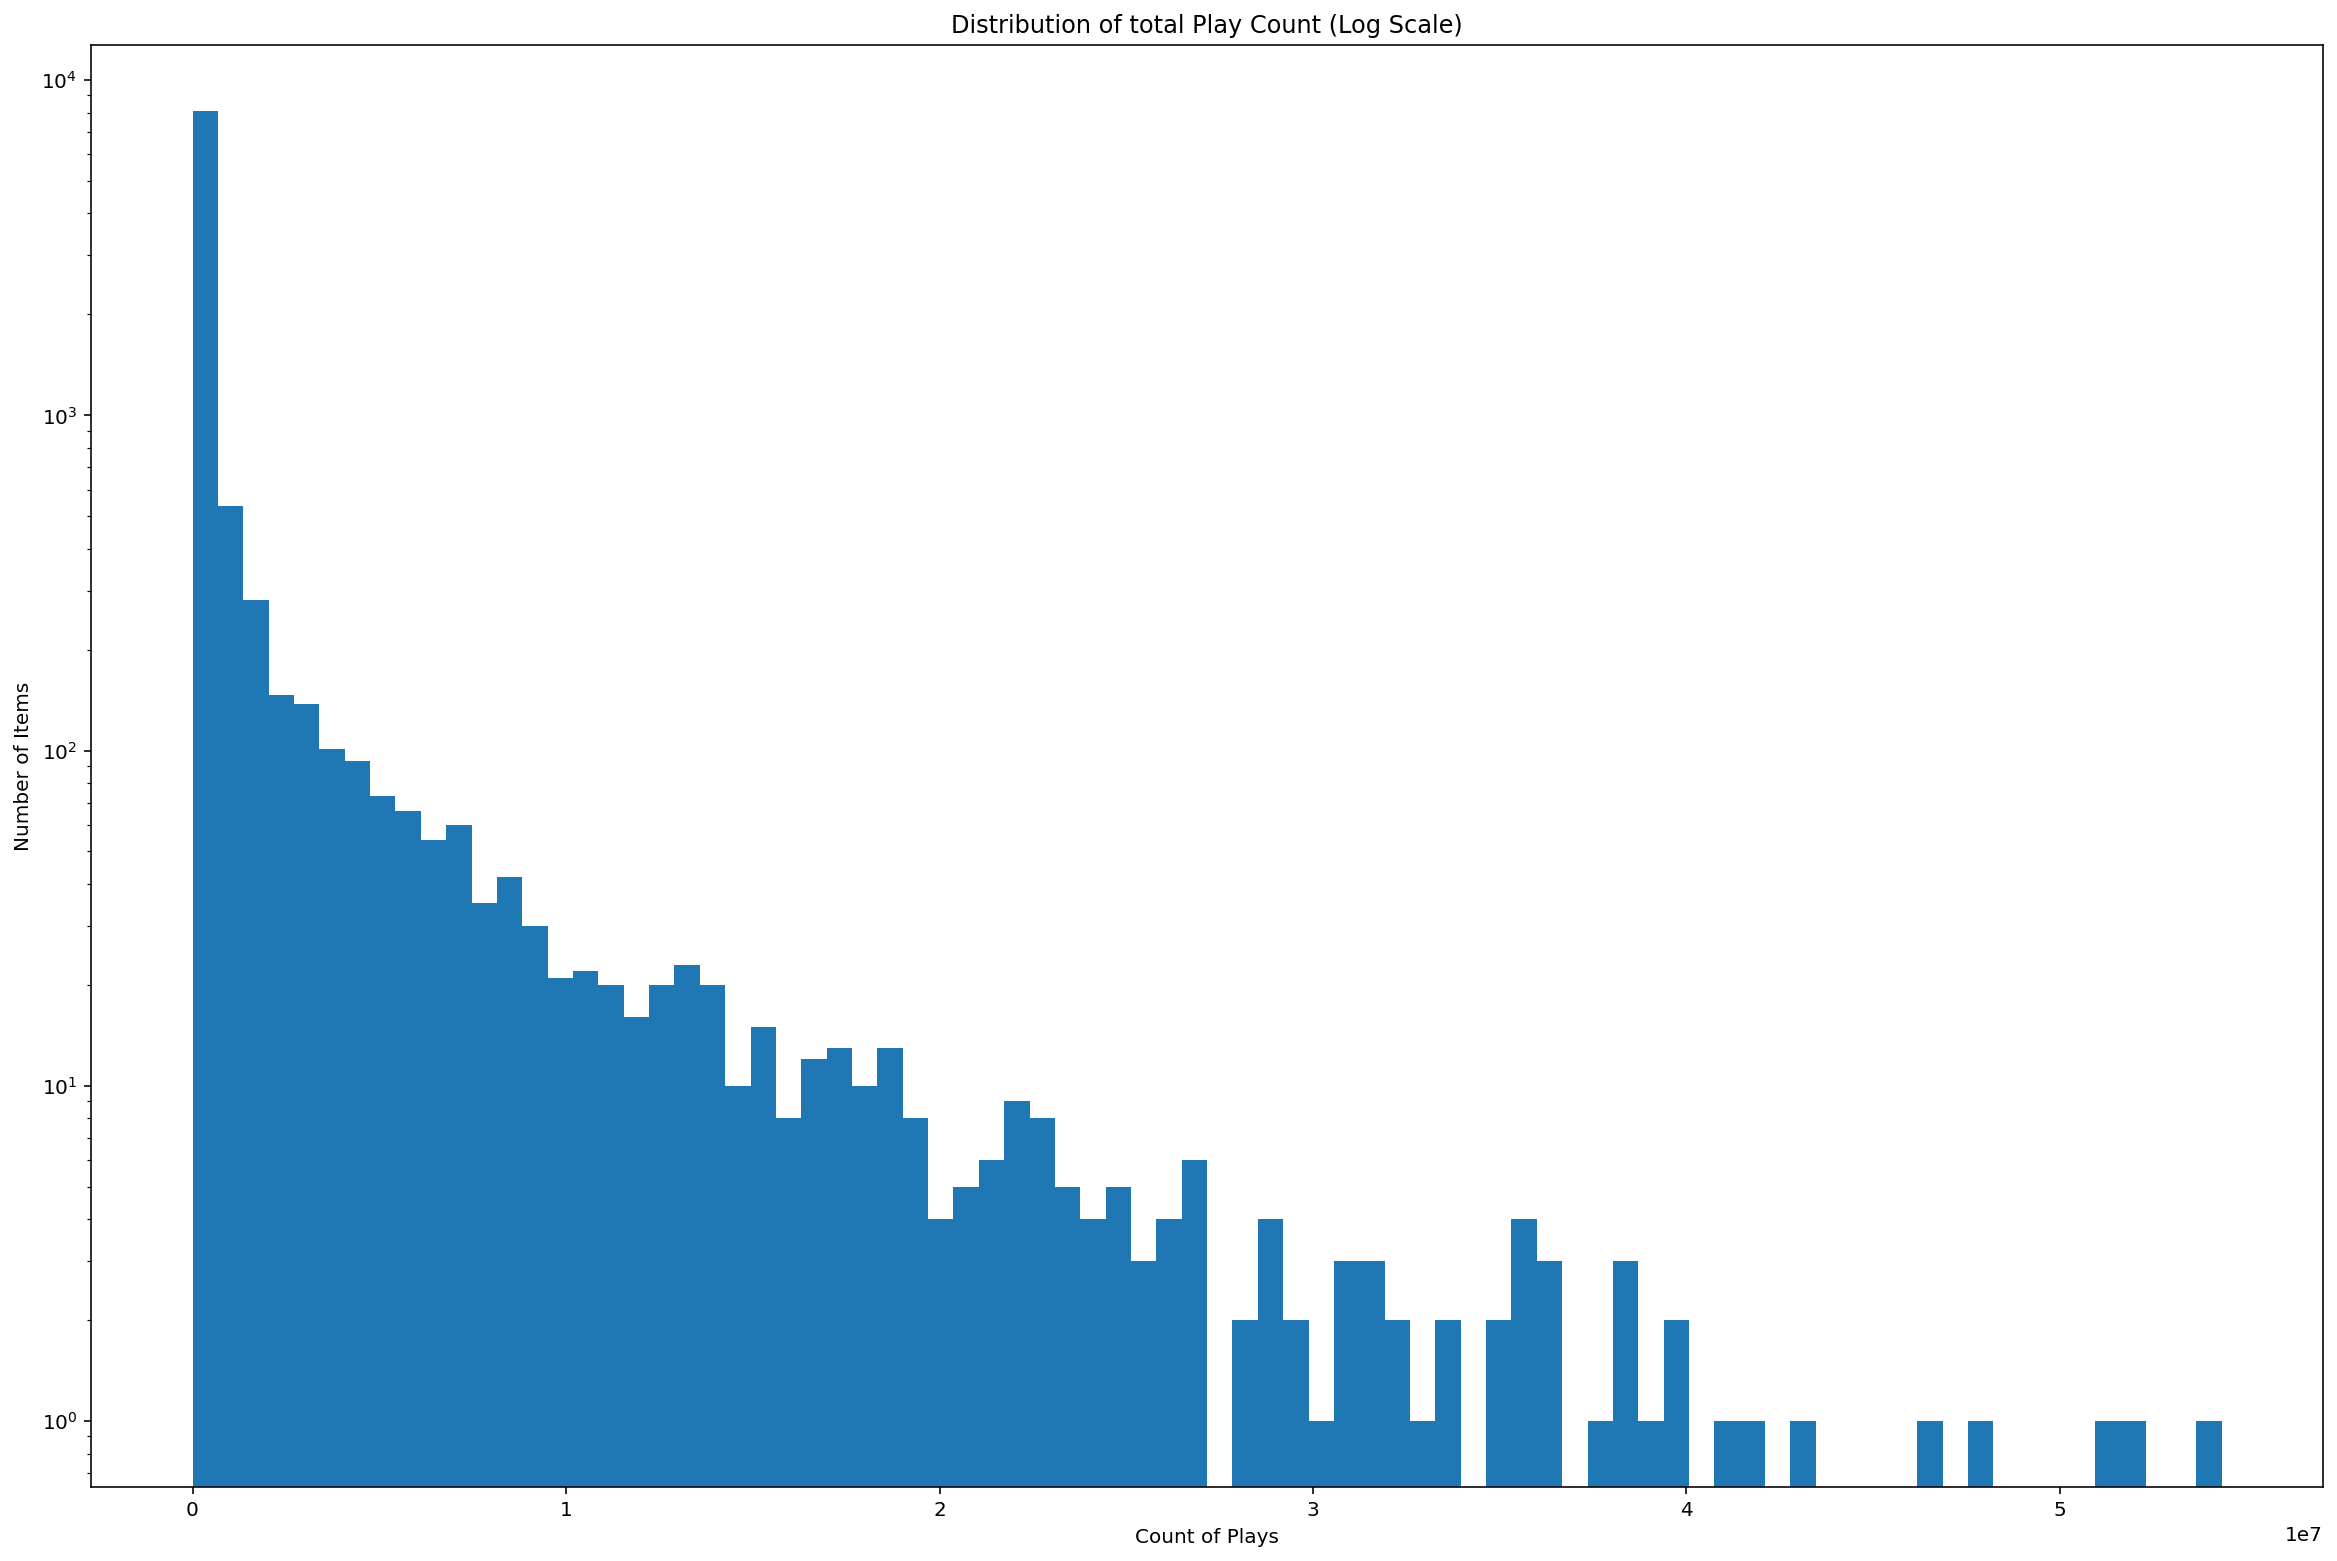

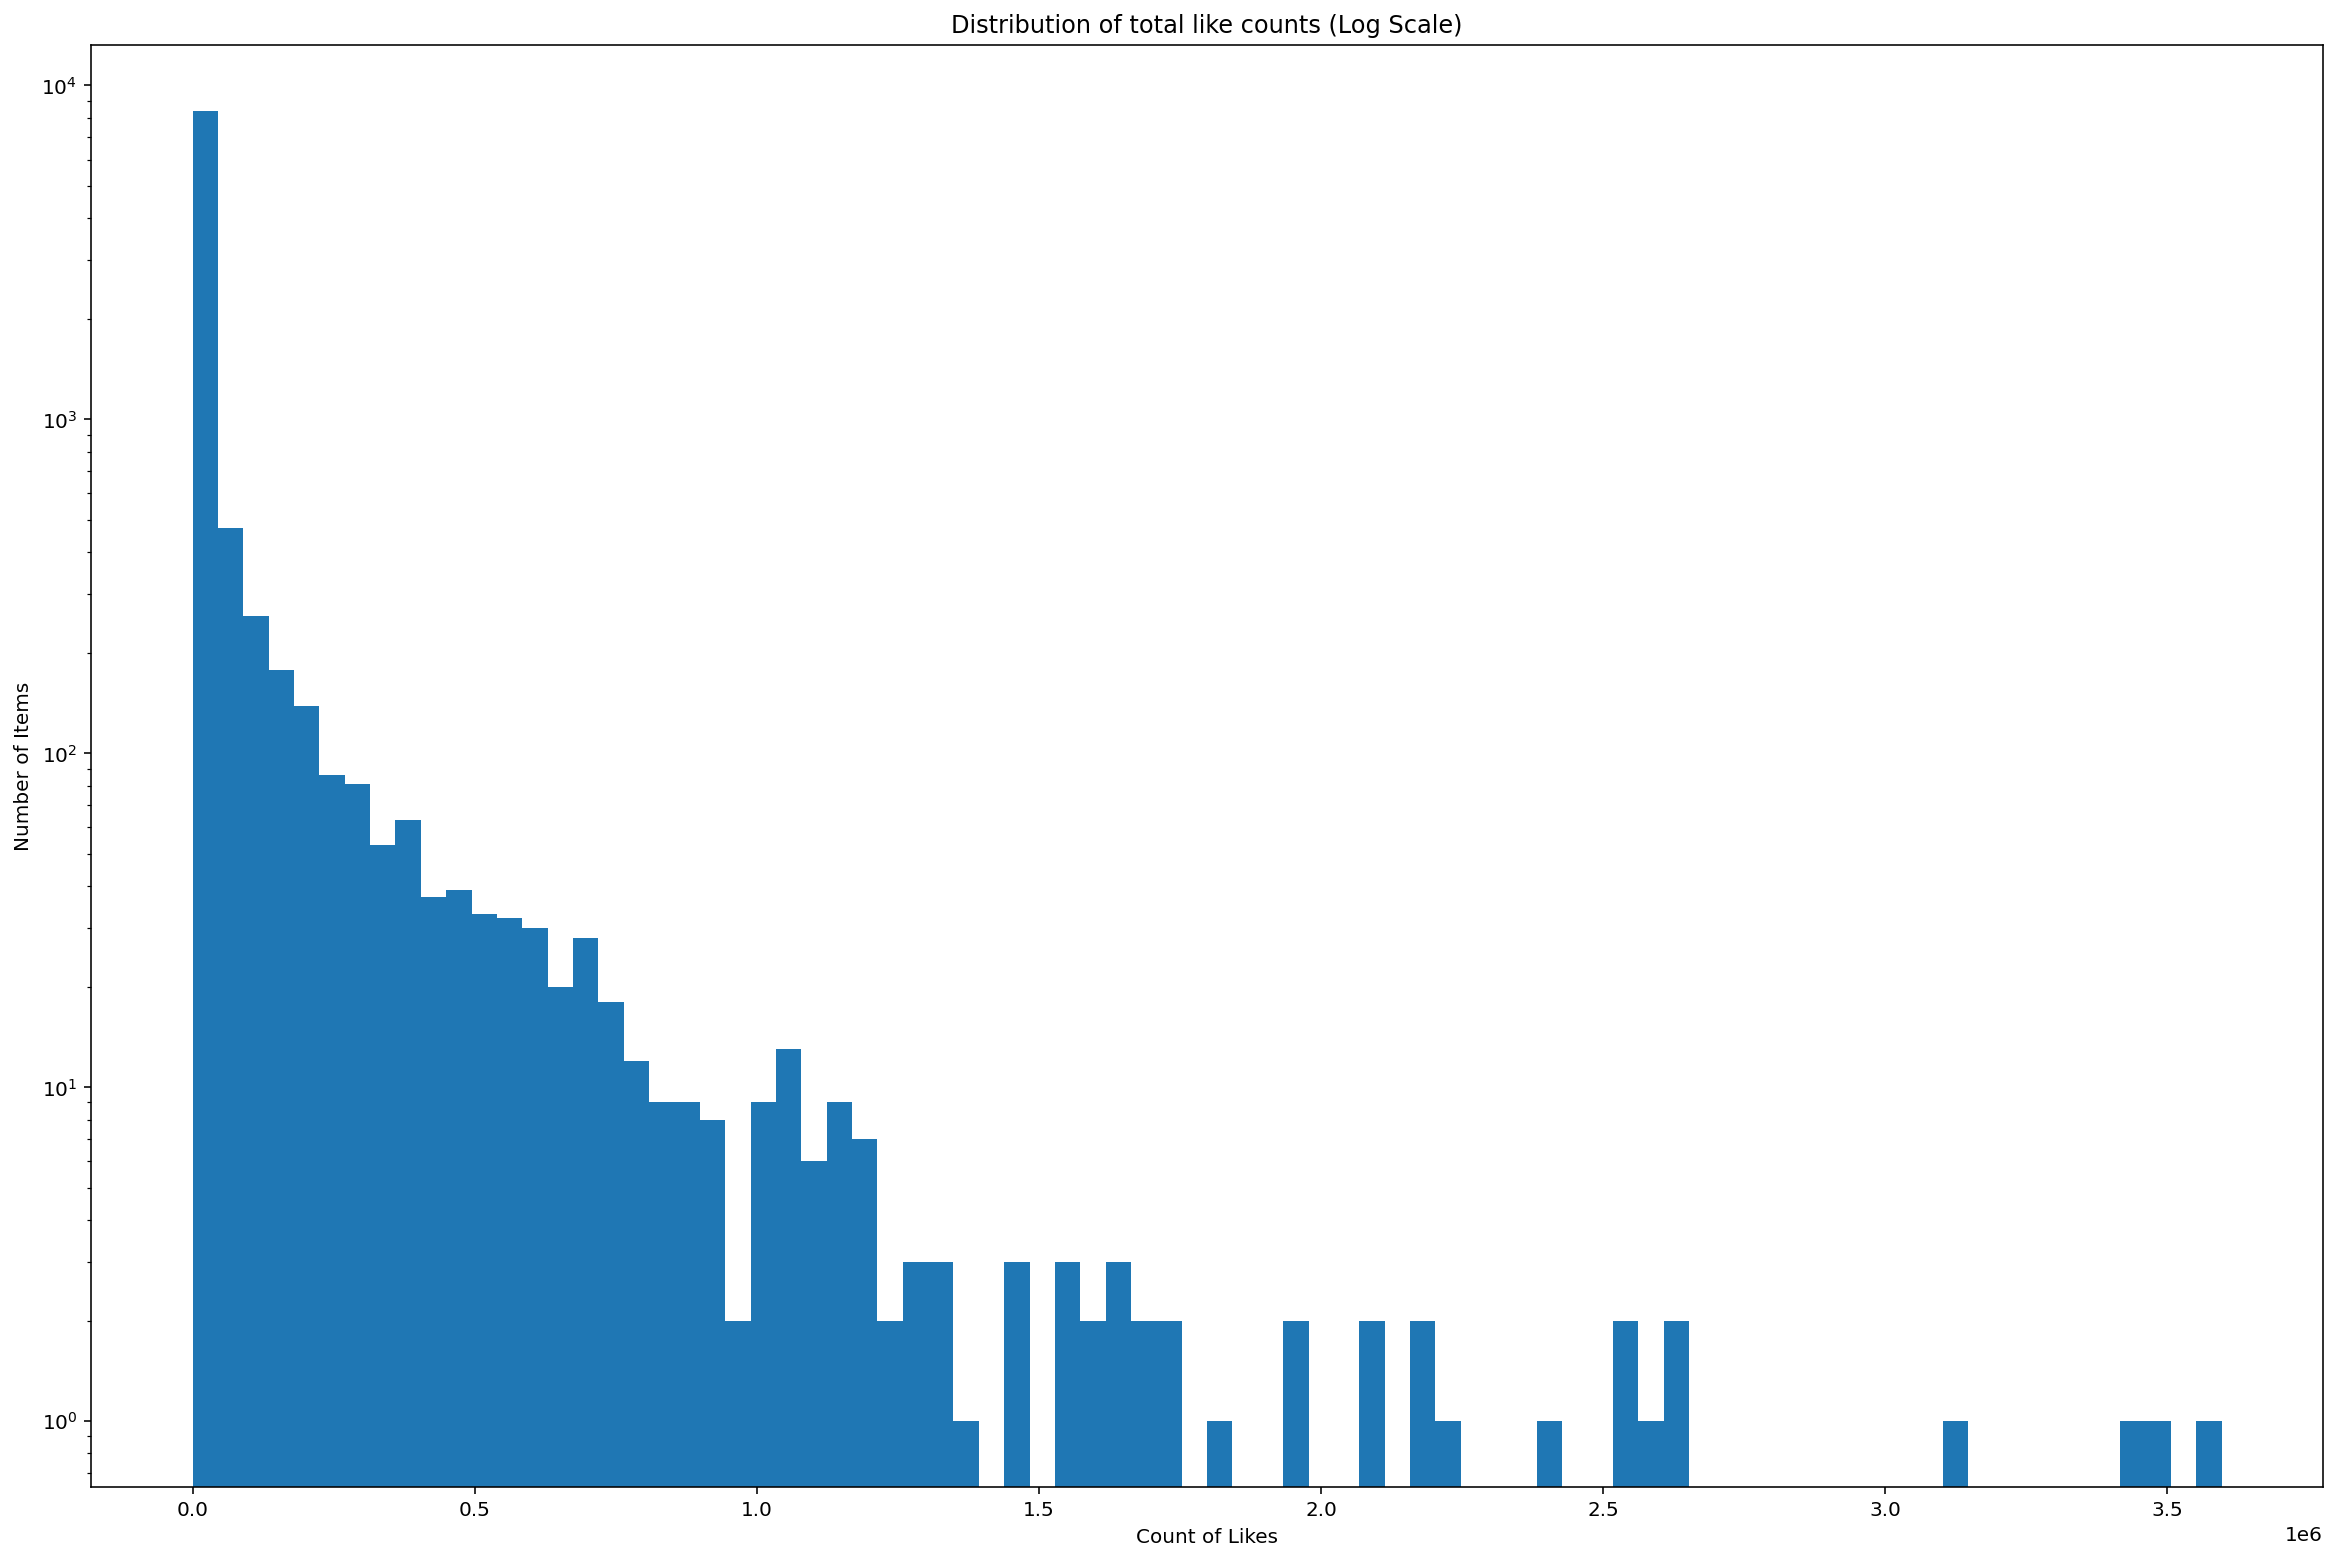

In [85]:
item_features = item_daily_features.groupby('video_id').agg({
    'like_cnt': 'sum',
    'like_user_num': 'sum',
    'download_cnt': 'sum',
    'comment_cnt': 'sum',
    'share_cnt': 'sum',
    'valid_play_cnt': 'sum',
    'play_user_num': 'sum',
    'play_duration': 'sum',
    'long_time_play_cnt': 'sum',
    'short_time_play_cnt': 'sum',
    'play_progress': 'mean',
}).reset_index()

# Get the number of categories per video

plt.hist(item_features['valid_play_cnt'], bins=80, log=True)
plt.ylabel('Number of Items')
plt.xlabel('Count of Plays')
plt.title('Distribution of total Play Count (Log Scale)')
plt.show()

plt.hist(item_features['like_cnt'], bins=80, log=True)
plt.ylabel('Number of Items')
plt.xlabel('Count of Likes')
plt.title('Distribution of total like counts (Log Scale)')
plt.show()


- This follows the activity noticed in the interactions, most videos have few to no likes / or plays

### Let's dive a little deeper into the analysis of video data

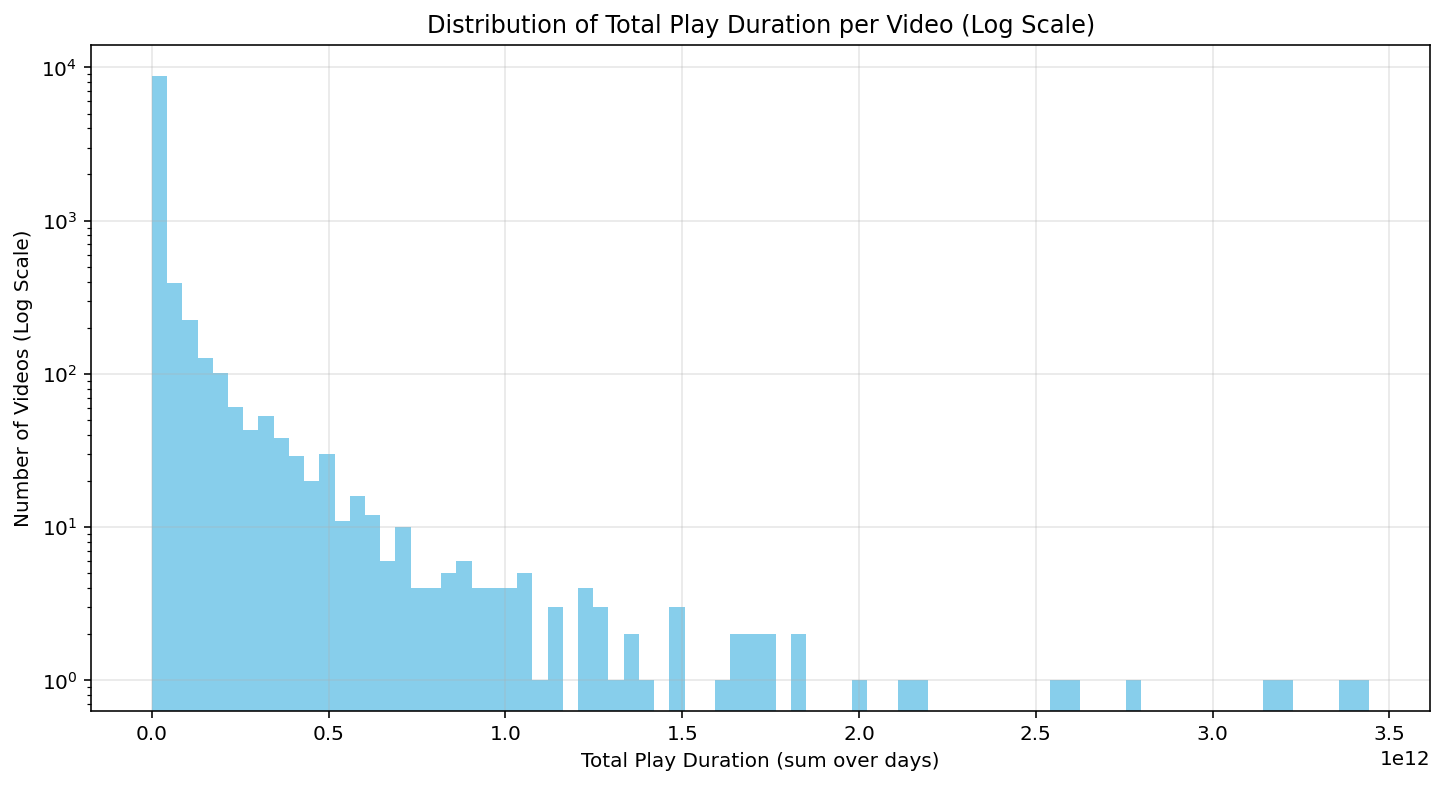

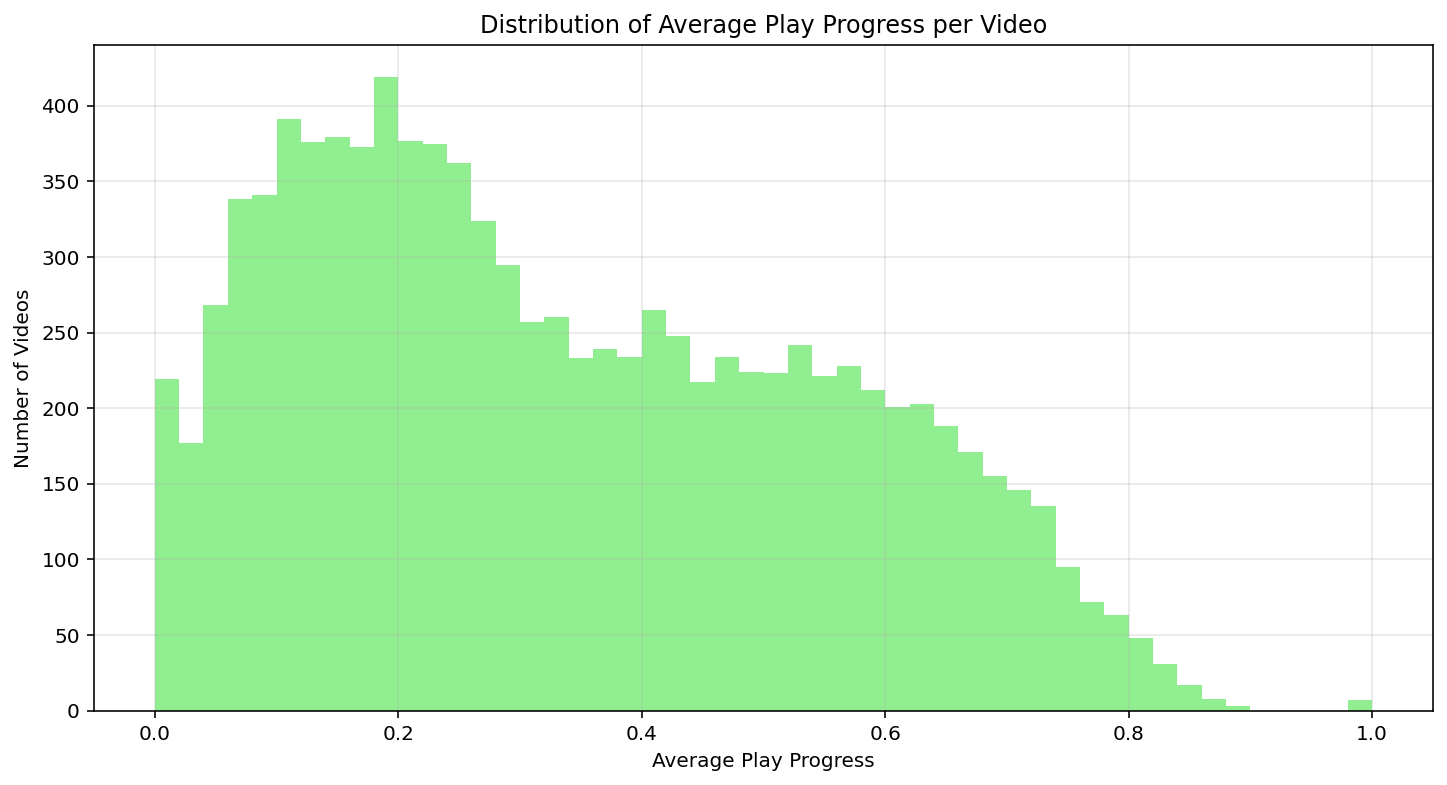

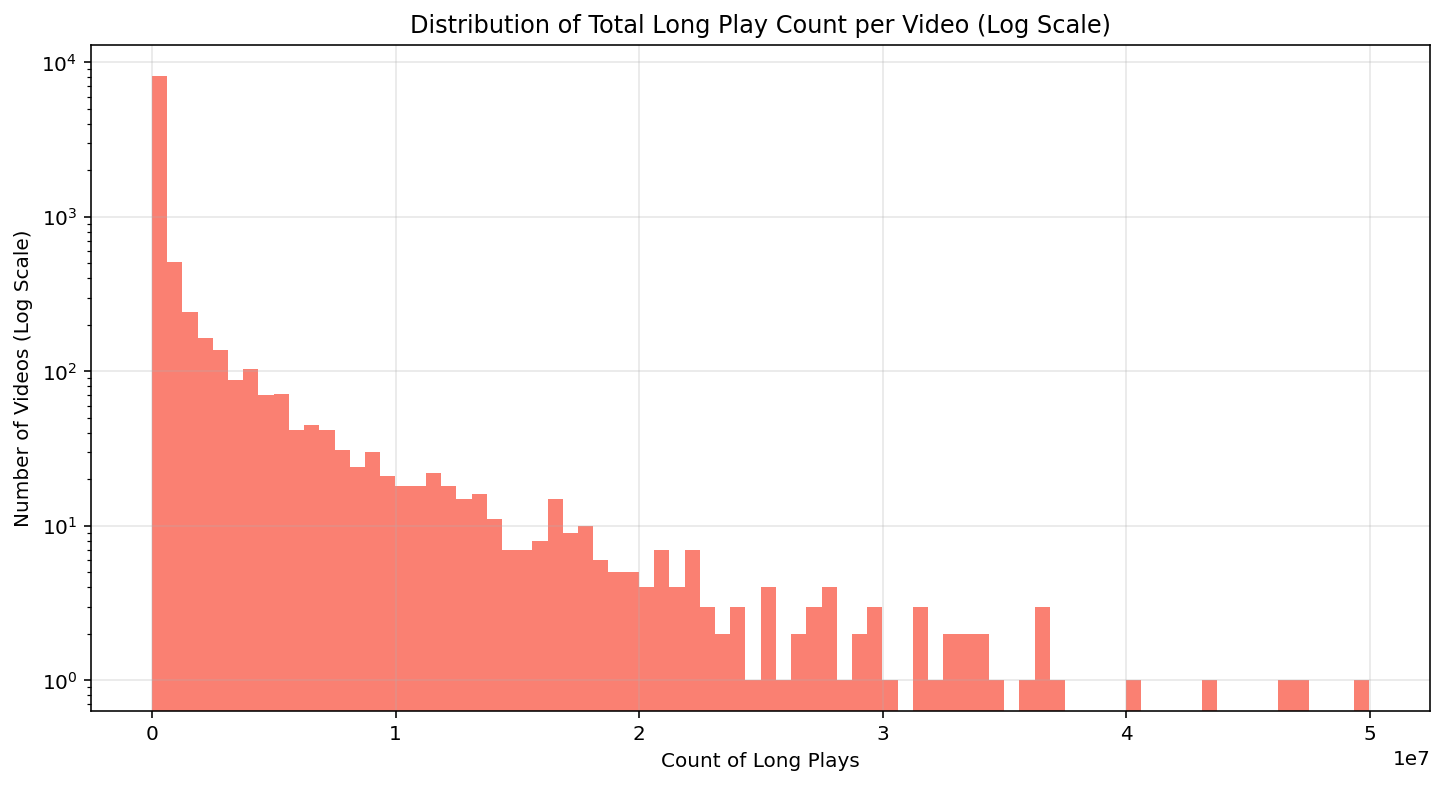

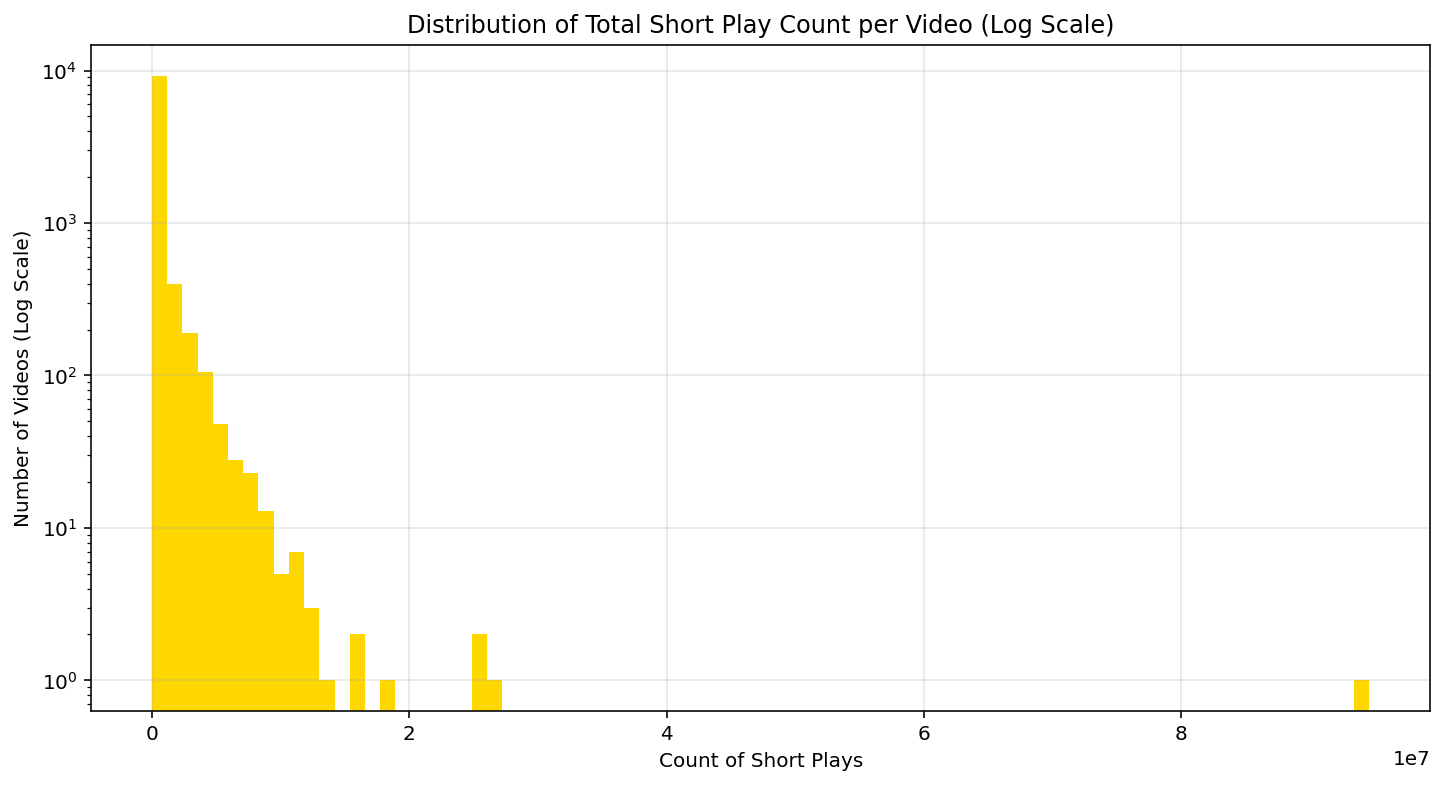

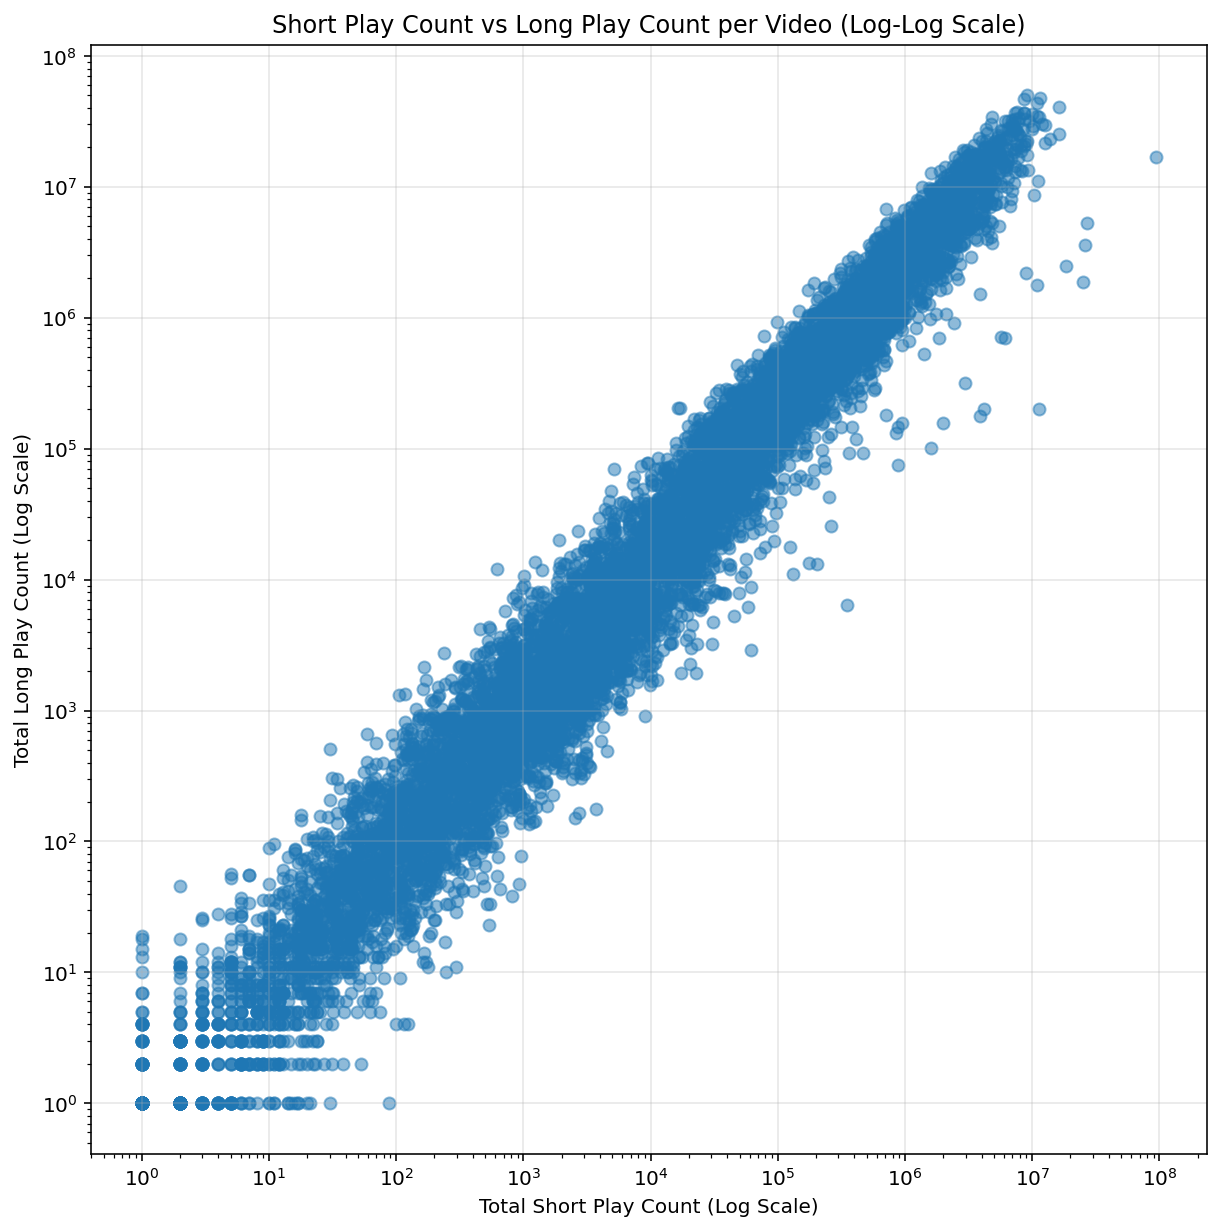

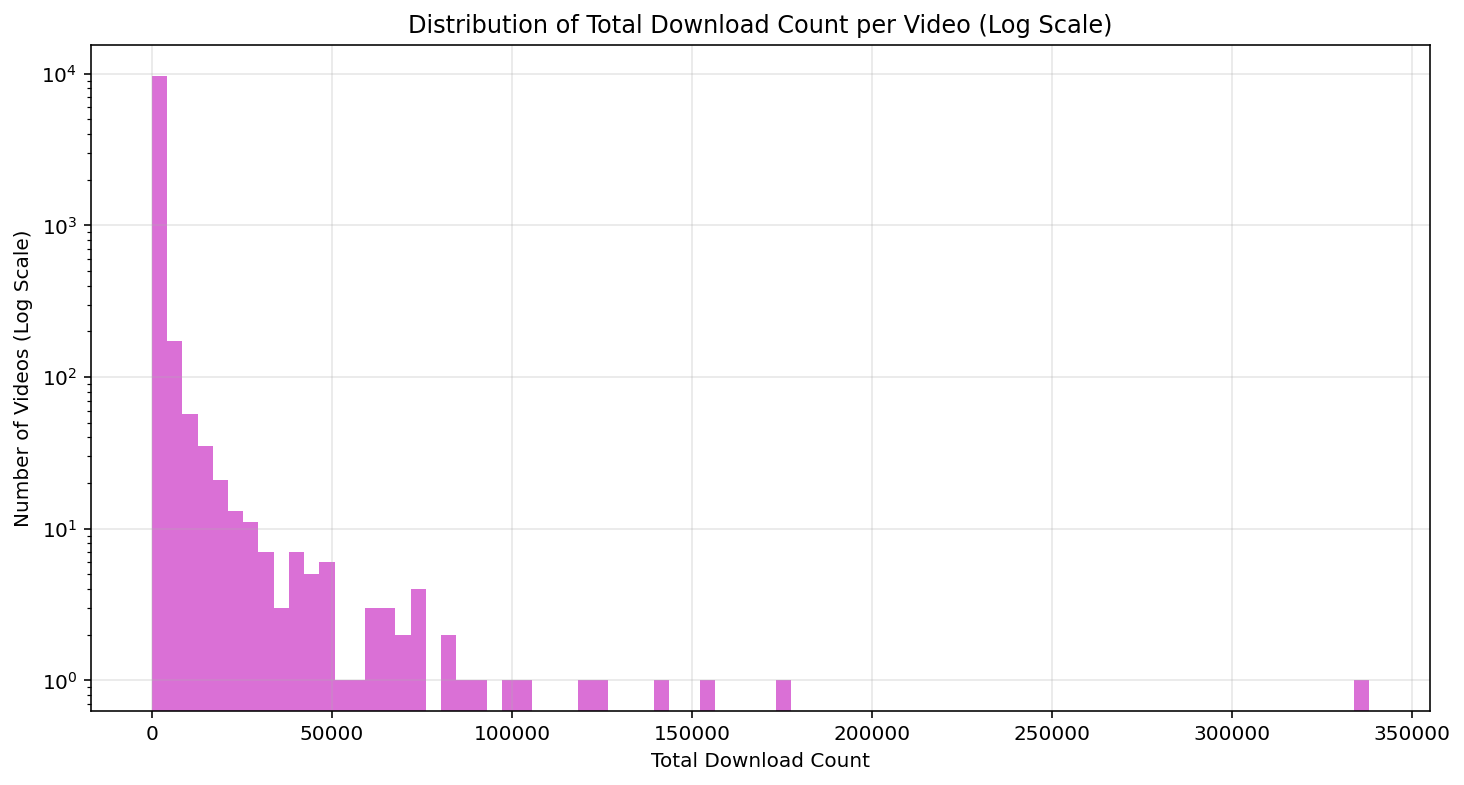

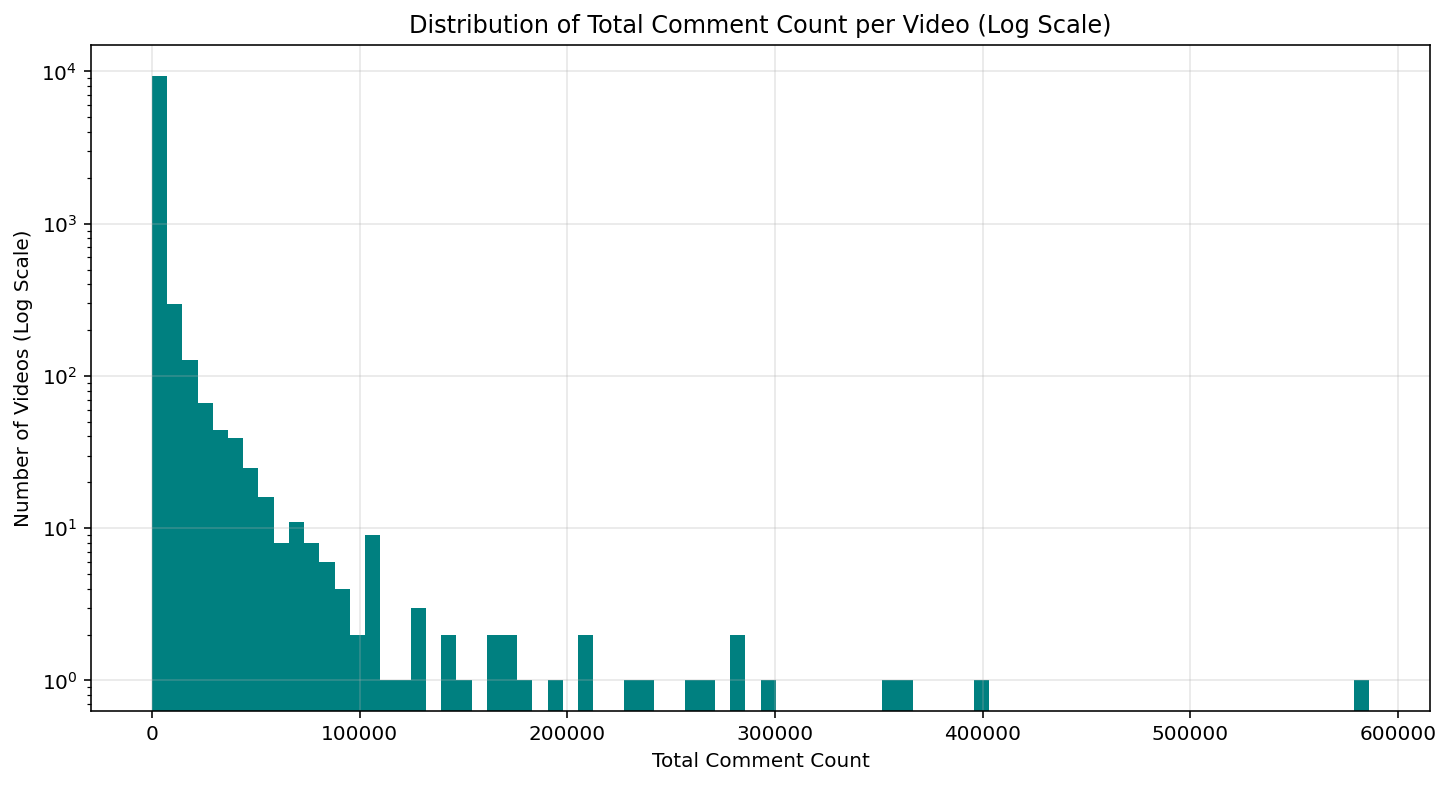

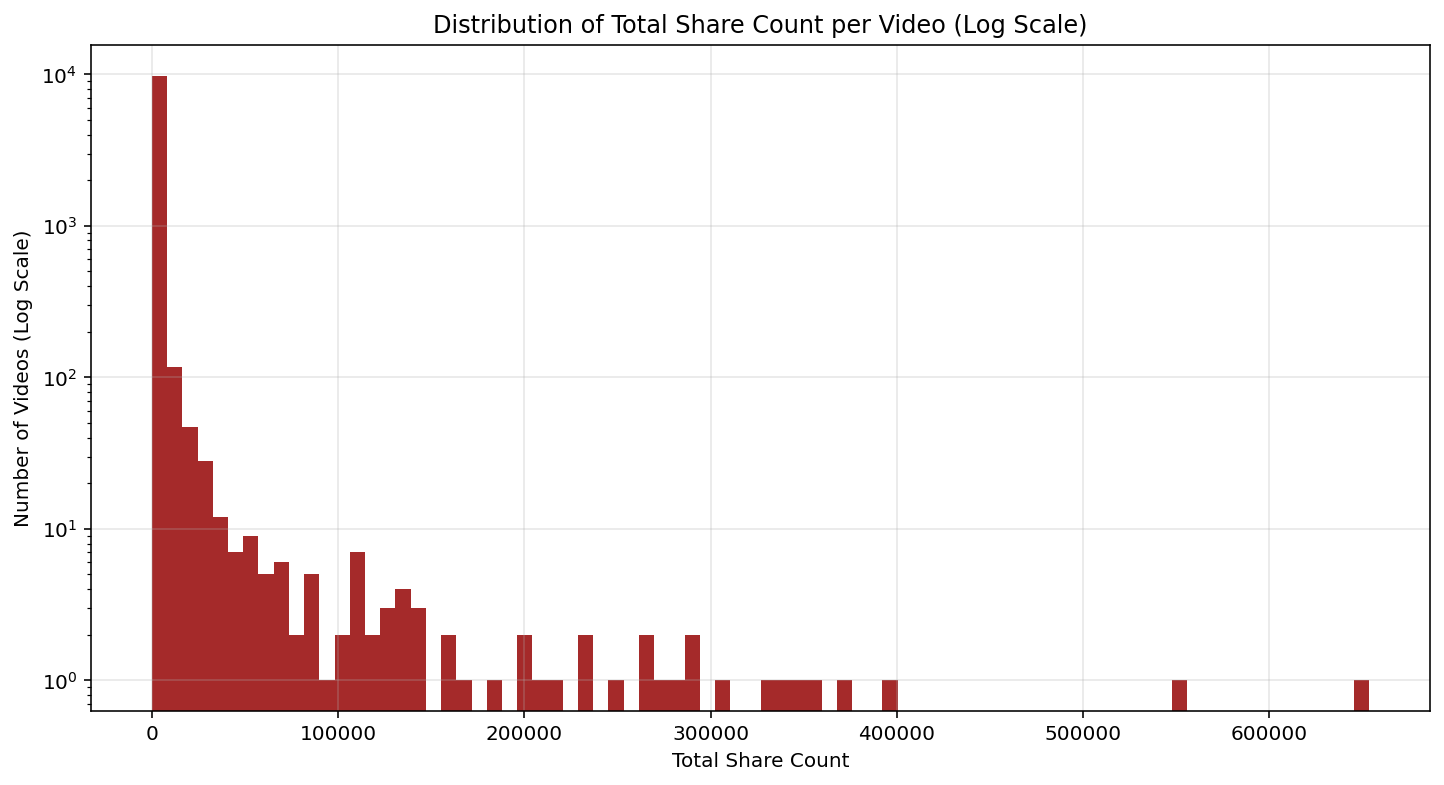

In [86]:
# Distribution of total play duration per video
plt.figure(figsize=(12, 6))
plt.hist(item_features['play_duration'], bins=80, log=True, color='skyblue')
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Total Play Duration (sum over days)')
plt.title('Distribution of Total Play Duration per Video (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of average play_progress per video
plt.figure(figsize=(12, 6))
plt.hist(item_features['play_progress'], bins=50, log=False, color='lightgreen') # Log scale might not be needed for progress (0-1)
plt.ylabel('Number of Videos')
plt.xlabel('Average Play Progress')
plt.title('Distribution of Average Play Progress per Video')
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of long_time_play_cnt per video
plt.figure(figsize=(12, 6))
plt.hist(item_features['long_time_play_cnt'], bins=80, log=True, color='salmon')
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Count of Long Plays')
plt.title('Distribution of Total Long Play Count per Video (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of short_time_play_cnt per video
plt.figure(figsize=(12, 6))
plt.hist(item_features['short_time_play_cnt'], bins=80, log=True, color='gold')
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Count of Short Plays')
plt.title('Distribution of Total Short Play Count per Video (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

# Comparison: Scatter plot of Long Plays vs Short Plays
plt.figure(figsize=(10, 10))
# Apply a small offset for log scale if zeros are present, or filter them
# For simplicity, let's filter out zeros for log scale or use symlog
# Using a simple filter for this example:
filtered_plays = item_features[(item_features['short_time_play_cnt'] > 0) & (item_features['long_time_play_cnt'] > 0)]
if not filtered_plays.empty:
    plt.scatter(filtered_plays['short_time_play_cnt'], filtered_plays['long_time_play_cnt'], alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Total Short Play Count (Log Scale)')
    plt.ylabel('Total Long Play Count (Log Scale)')
    plt.title('Short Play Count vs Long Play Count per Video (Log-Log Scale)')
    plt.grid(True, alpha=0.3)
else:
    print("Not enough data points with both short and long plays > 0 for a meaningful log-log scatter plot.")
plt.show()

# Distribution of download_cnt per video
plt.figure(figsize=(12, 6))
plt.hist(item_features['download_cnt'], bins=80, log=True, color='orchid')
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Total Download Count')
plt.title('Distribution of Total Download Count per Video (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of comment_cnt per video
plt.figure(figsize=(12, 6))
plt.hist(item_features['comment_cnt'], bins=80, log=True, color='teal')
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Total Comment Count')
plt.title('Distribution of Total Comment Count per Video (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

# Distribution of share_cnt per video
plt.figure(figsize=(12, 6))
plt.hist(item_features['share_cnt'], bins=80, log=True, color='brown')
plt.ylabel('Number of Videos (Log Scale)')
plt.xlabel('Total Share Count')
plt.title('Distribution of Total Share Count per Video (Log Scale)')
plt.grid(True, alpha=0.3)
plt.show()

We can see that most of these plots follow the same trend: most of the videos have few interactions overall and that most videos are not even watched halfway through

For a more complete understanding of the dataset, please visit the official link of kuairec with information about every field : https://kuairec.com/

### Save cleaned data

In [87]:
big_matrix.to_csv("data/big_matrix_cleaned.csv", index=False)
small_matrix.to_csv("data/small_matrix_cleaned.csv", index=False)
item_features.to_csv("data/item_features_cleaned.csv", index=False)
item_daily_features.to_csv("data/item_daily_features_cleaned.csv", index=False)
item_categories.to_csv("data/item_categories_cleaned.csv", index=False)
user_features.to_csv("data/user_features_cleaned.csv", index=False)
caption_category.to_csv("data/caption_category_cleaned.csv", index=False)
social_network.to_csv("data/social_network_cleaned.csv", index=False)